# Data & Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
def clean_column_name(x):
    x=x.str.strip()
    x=x.str.replace(' ', '_')
    x=x.str.lower()
    return x

c:\Users\91903\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\91903\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
C:\Users\91903\AppData\Local\Temp\ipykernel_18732\2093452394.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df_train=pd.read_csv(r'D:\Data Science and OSU\Solo Projects\HousePricePrediction\house-prices-advanced-regression-techniques\train.csv')
df_train.columns=clean_column_name(df_train.columns)

In [3]:
cols=df_train.columns.tolist()
#print(len(cols))
continious_variables=['lotfrontage', 'lotarea','masvnrarea','bsmtfinsf1','bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', '1stflrsf', '2ndflrsf', 'lowqualfinsf','grlivarea','bsmtfullbath','bsmthalfbath','fullbath','halfbath','bedroomabvgr',
'kitchenabvgr', 'totrmsabvgrd', 'garageyrblt', 'garagecars','garagearea', 'wooddecksf',	'openporchsf',	'enclosedporch','3ssnporch','screenporch','poolarea', 'miscval','mosold','yrsold', 'saleprice']
#print(len(continious_variables))
cat_variables=[cols[i] for i in range(len(cols)) if cols[i] not in continious_variables]
#print(len(cat_variables))

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1460 non-null   int64  
 1   mssubclass     1460 non-null   int64  
 2   mszoning       1460 non-null   object 
 3   lotfrontage    1201 non-null   float64
 4   lotarea        1460 non-null   int64  
 5   street         1460 non-null   object 
 6   alley          91 non-null     object 
 7   lotshape       1460 non-null   object 
 8   landcontour    1460 non-null   object 
 9   utilities      1460 non-null   object 
 10  lotconfig      1460 non-null   object 
 11  landslope      1460 non-null   object 
 12  neighborhood   1460 non-null   object 
 13  condition1     1460 non-null   object 
 14  condition2     1460 non-null   object 
 15  bldgtype       1460 non-null   object 
 16  housestyle     1460 non-null   object 
 17  overallqual    1460 non-null   int64  
 18  overallc

# Step 2 Exploratory Data Analysis 

Dependent Variable distribution and analysis

<AxesSubplot:xlabel='saleprice'>

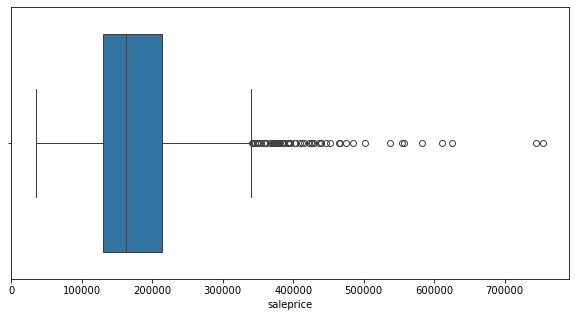

In [5]:
# Check dependent variable distribution

plt.figure(figsize=(10,5))
sns.boxplot(data=df_train, x='saleprice')

In [8]:
pip install --upgrade seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.1
    Uninstalling seaborn-0.10.1:
      Successfully uninstalled seaborn-0.10.1
Note: you may need to restart the kernel to use updated packages.


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

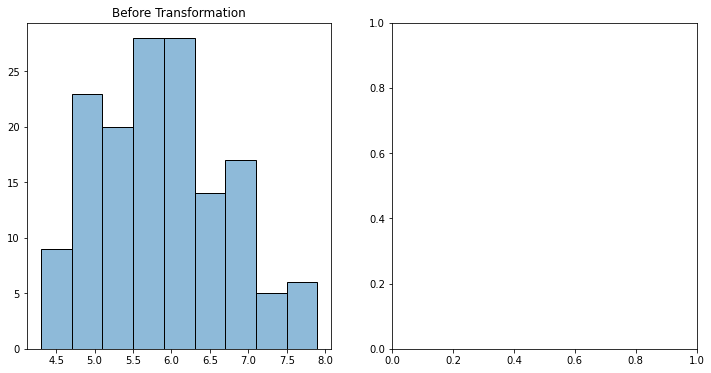

In [7]:
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

# Load the Iris dataset
iris = sns.load_dataset('iris')

# Select a numerical column for the normality check
numerical_column = 'sepal_length'

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram and probability plot before transformation
axes[0].set_title('Before Transformation')
sns.histplot(iris[numerical_column], kde=True, ax=axes[0])
stats.probplot(iris[numerical_column], plot=axes[1], fit=stats.norm)

plt.tight_layout()
plt.show()

# Log transformation
iris['log_sepal_length'] = np.log(iris[numerical_column])

# Create subplots for the transformed data
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram and probability plot after transformation
axes[0].set_title('After Log Transformation')
sns.histplot(iris['log_sepal_length'], kde=True, ax=axes[0])
stats.probplot(iris['log_sepal_length'], plot=axes[1], fit=stats.norm)

plt.tight_layout()
plt.show()


Normal Distribution check, Q-Q plot, Skewness and Kurtosis

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

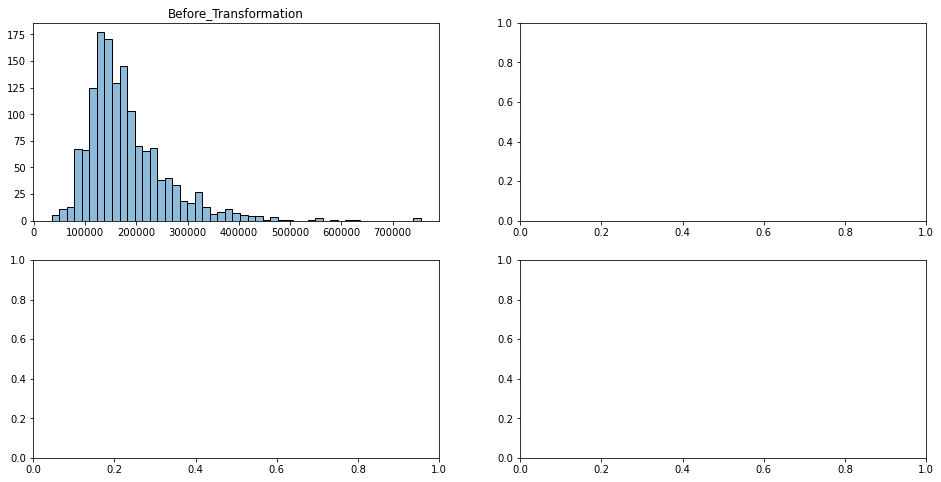

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

fig, axes = plt.subplots(2, 2, figsize=(16, 8))

plotting_col = df_train['saleprice']

axes[0, 0].set_title('Before_Transformation')
sns.histplot(plotting_col, kde=True, ax=axes[0, 0])
stats.probplot(plotting_col, plot=axes[1, 0], fit=stats.norm)  # You can use fit here

axes[0, 1].set_title('After_Transformation')
sns.histplot(np.log(plotting_col), kde=True, ax=axes[0, 1])
stats.probplot(np.log(plotting_col), plot=axes[1, 1], fit=stats.norm)  # You can use fit here

plt.tight_layout()

print('\nBefore Transformation Skewness: {}, Excess Kurtosis: {}'.format(plotting_col.skew(), plotting_col.kurtosis()))
print('\nAfter Transformation Skewness: {}, Excess Kurtosis: {}'.format(np.log(plotting_col).skew(), np.log(plotting_col).kurtosis()))

plt.show()


<AxesSubplot:xlabel='saleprice'>

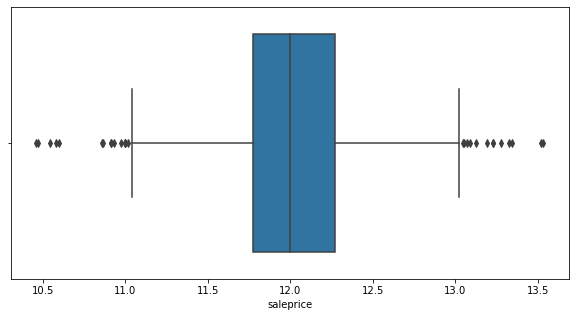

In [7]:
# Check dependent variable distribution after log transformation
plotting_col = df_train['saleprice']
plt.figure(figsize=(10,5))
sns.boxplot(x=np.log(plotting_col))

Heat Map to find highly correlated numerical features with dependent variable (saleprice)

<AxesSubplot:>

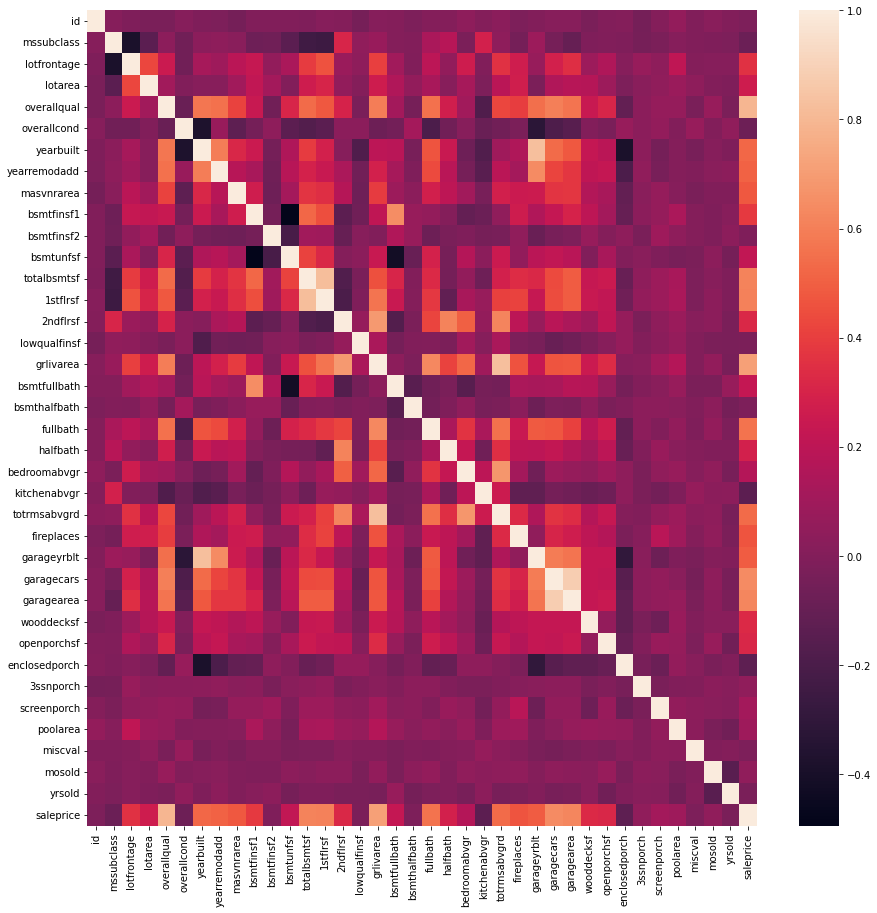

In [8]:
plt.figure(figsize=(15,15))
sns.heatmap(df_train.corr())

Numerical features correlation with 'saleprice' in descending order

Text(0.5, 1.0, 'Correlation between saleprice and numerical variables')

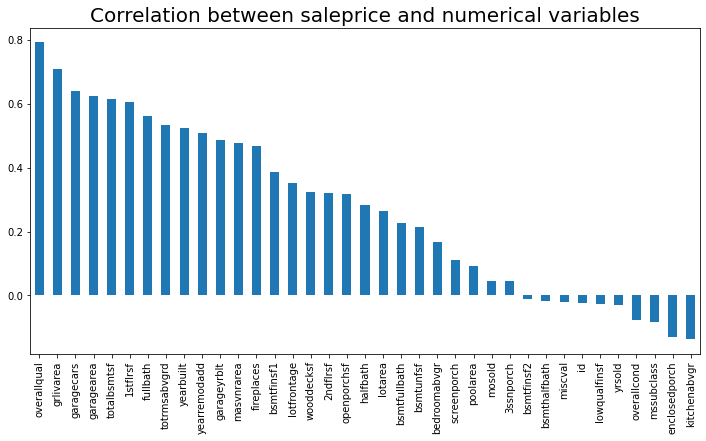

In [9]:
plt.figure(figsize=(12,6))
df_train.select_dtypes(include=[np.number]).corr()['saleprice'].sort_values(ascending=False).drop('saleprice').plot(kind='bar')
plt.title('Correlation between saleprice and numerical variables', fontsize = 20 )

In [10]:
top_10_corr_features = df_train.corr()['saleprice'].sort_values(ascending=False).head(10)
top_10_corr_num_features = df_train.corr()[['saleprice']].select_dtypes(include=['float64']).drop('saleprice').sort_values(by='saleprice', ascending=False).head(10)
print(top_10_corr_num_features)

              saleprice
overallqual    0.790982
grlivarea      0.708624
garagecars     0.640409
garagearea     0.623431
totalbsmtsf    0.613581
1stflrsf       0.605852
fullbath       0.560664
totrmsabvgrd   0.533723
yearbuilt      0.522897
yearremodadd   0.507101


Distribution of 10 highly correlated Independent Continious Variables: Normality distribution check, Q-Q plot, Skewness, Kurtosis

In [1]:
#grlivarea

fig, axes = plt.subplots(2,2,figsize=(15,8))
plotting_col = df_train['grlivarea']

axes[0,0].set_title('Before_Transformation')
sns.distplot(plotting_col, fit = stats.norm, ax = axes[0,0])
stats.probplot(plotting_col, plot=axes[1,0])

axes[0,1].set_title('After_Transformation')
sns.distplot(np.log(plotting_col), fit = stats.norm, ax = axes[0,1])
stats.probplot(np.log(plotting_col), plot=axes[1,1])

plt.tight_layout()

print(f'Before transformation skewness: {plotting_col.skew()}, excess kurtosis:{plotting_col.kurtosis()}')
print(f'After transformation skewness: {np.log(plotting_col).skew()}, excess kurtosis:{np.log(plotting_col).kurtosis()}')

NameError: name 'plt' is not defined

c:\Users\91903\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\91903\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Before transformation skewness: 0.8110368967447983, excess kurtosis:1.1896366501064222
After transformation skewness: -0.2505408706707518, excess kurtosis:-0.22785248466286978


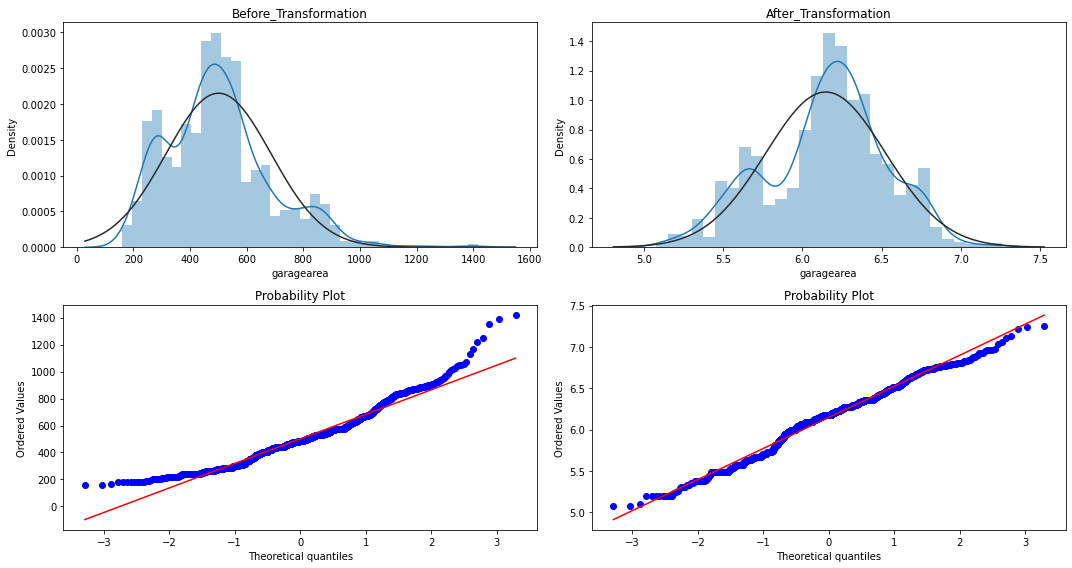

In [12]:
#garagearea (only for houses with garage)

fig, axes = plt.subplots(2,2,figsize=(15,8))

plotting_col = df_train[df_train['garagearea']>0]['garagearea']

axes[0,0].set_title('Before_Transformation')
sns.distplot(plotting_col, fit = stats.norm, ax = axes[0,0])
stats.probplot(plotting_col, plot=axes[1,0])

axes[0,1].set_title('After_Transformation')
sns.distplot(np.log(plotting_col), fit = stats.norm, ax = axes[0,1])
stats.probplot(np.log(plotting_col), plot=axes[1,1])

plt.tight_layout()

print(f'Before transformation skewness: {plotting_col.skew()}, excess kurtosis:{plotting_col.kurtosis()}')
print(f'After transformation skewness: {np.log(plotting_col).skew()}, excess kurtosis:{np.log(plotting_col).kurtosis()}')

c:\Users\91903\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\91903\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Before transformation skewness: 2.1711204176822894, excess kurtosis:17.211397475426022
After transformation skewness: -0.27581597237350997, excess kurtosis:1.9346775731369186


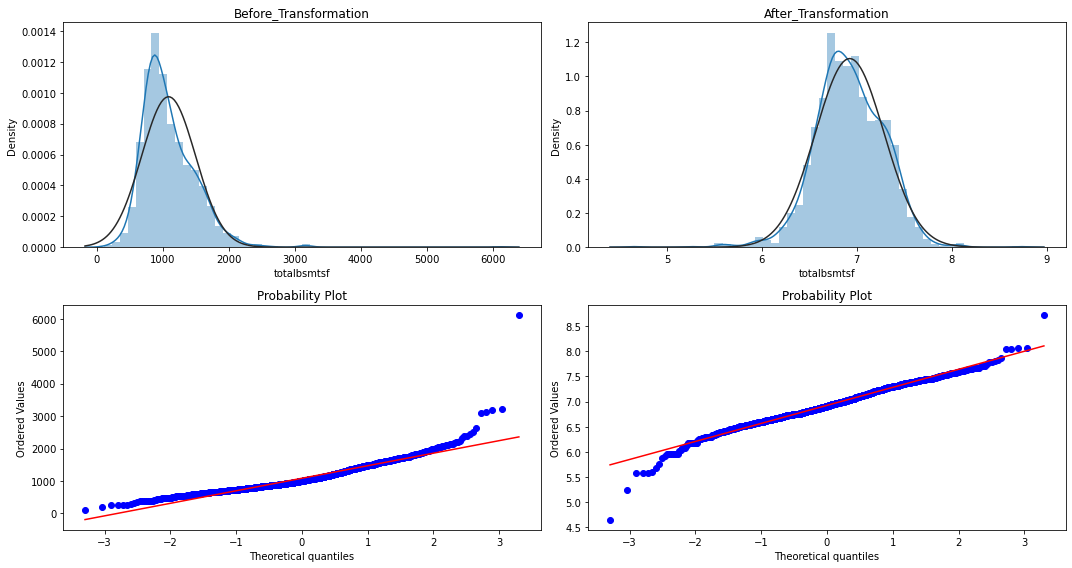

In [13]:
#totalbsmtsf (only for houses with basement)

fig, axes = plt.subplots(2,2,figsize=(15,8))

plotting_col = df_train[df_train['totalbsmtsf']>0]['totalbsmtsf']

axes[0,0].set_title('Before_Transformation')
sns.distplot(plotting_col, fit = stats.norm, ax = axes[0,0])
stats.probplot(plotting_col, plot=axes[1,0])

axes[0,1].set_title('After_Transformation')
sns.distplot(np.log(plotting_col), fit = stats.norm, ax = axes[0,1])
stats.probplot(np.log(plotting_col), plot=axes[1,1])

plt.tight_layout()

print(f'Before transformation skewness: {plotting_col.skew()}, excess kurtosis:{plotting_col.kurtosis()}')
print(f'After transformation skewness: {np.log(plotting_col).skew()}, excess kurtosis:{np.log(plotting_col).kurtosis()}')

c:\Users\91903\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\91903\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Before transformation skewness: 1.3767566220336365, excess kurtosis:5.74584148244079
After transformation skewness: 0.07915695223960692, excess kurtosis:0.15080801512274444


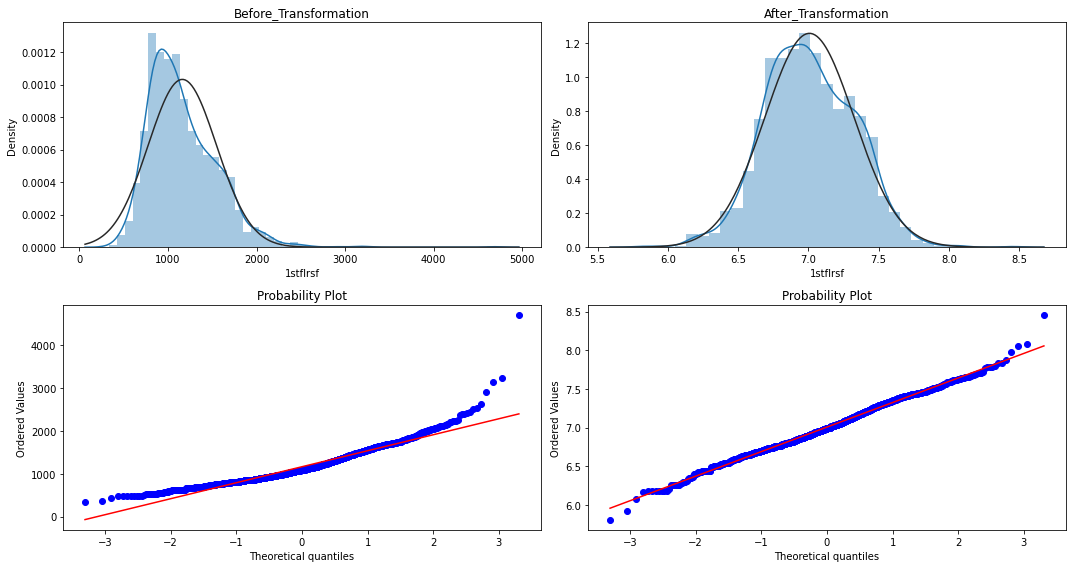

In [14]:
#1stflrsf

fig, axes = plt.subplots(2,2,figsize=(15,8))

plotting_col = df_train[df_train['1stflrsf']>0]['1stflrsf']

axes[0,0].set_title('Before_Transformation')
sns.distplot(plotting_col, fit = stats.norm, ax = axes[0,0])
stats.probplot(plotting_col, plot=axes[1,0])

axes[0,1].set_title('After_Transformation')
sns.distplot(np.log(plotting_col), fit = stats.norm, ax = axes[0,1])
stats.probplot(np.log(plotting_col), plot=axes[1,1])

plt.tight_layout()

print(f'Before transformation skewness: {plotting_col.skew()}, excess kurtosis:{plotting_col.kurtosis()}')
print(f'After transformation skewness: {np.log(plotting_col).skew()}, excess kurtosis:{np.log(plotting_col).kurtosis()}')

c:\Users\91903\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\91903\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Before transformation skewness: 2.0938768726866663, excess kurtosis:6.749193025251634
After transformation skewness: -1.1190628659833202, excess kurtosis:4.124495577943629


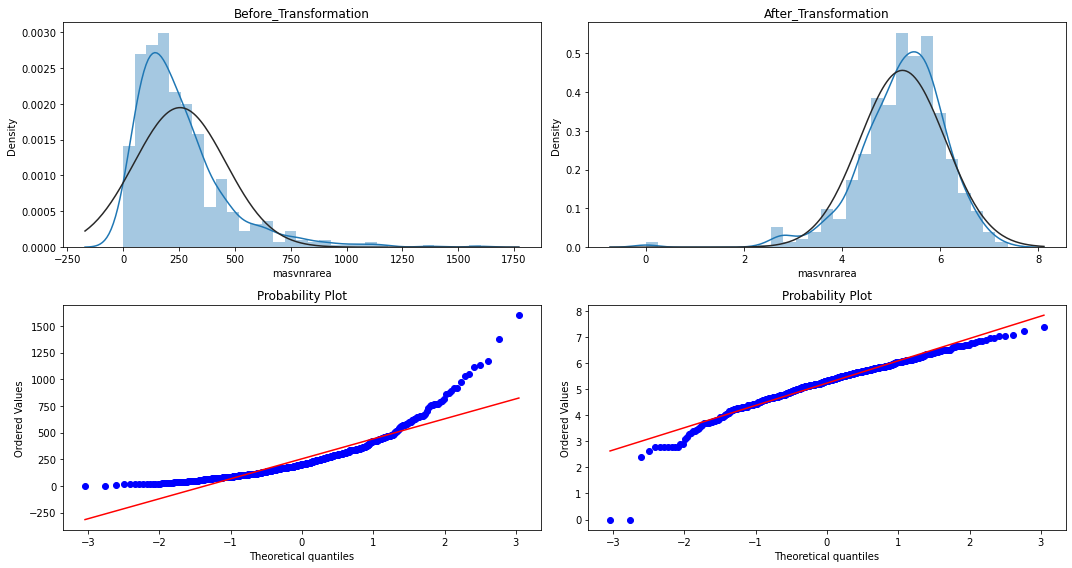

In [15]:
#masvnrarea (only with houses with vineer area)

fig, axes = plt.subplots(2,2,figsize=(15,8))

plotting_col = df_train[df_train['masvnrarea']>0]['masvnrarea']

axes[0,0].set_title('Before_Transformation')
sns.distplot(plotting_col, fit = stats.norm, ax = axes[0,0])
stats.probplot(plotting_col, plot=axes[1,0])

axes[0,1].set_title('After_Transformation')
sns.distplot(np.log(plotting_col), fit = stats.norm, ax = axes[0,1])
stats.probplot(np.log(plotting_col), plot=axes[1,1])

plt.tight_layout()

print(f'Before transformation skewness: {plotting_col.skew()}, excess kurtosis:{plotting_col.kurtosis()}')
print(f'After transformation skewness: {np.log(plotting_col).skew()}, excess kurtosis:{np.log(plotting_col).kurtosis()}')

c:\Users\91903\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\91903\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Before transformation skewness: 2.3022746068878592, excess kurtosis:21.323684299099366
After transformation skewness: -1.8756911084287413, excess kurtosis:4.92921998214014


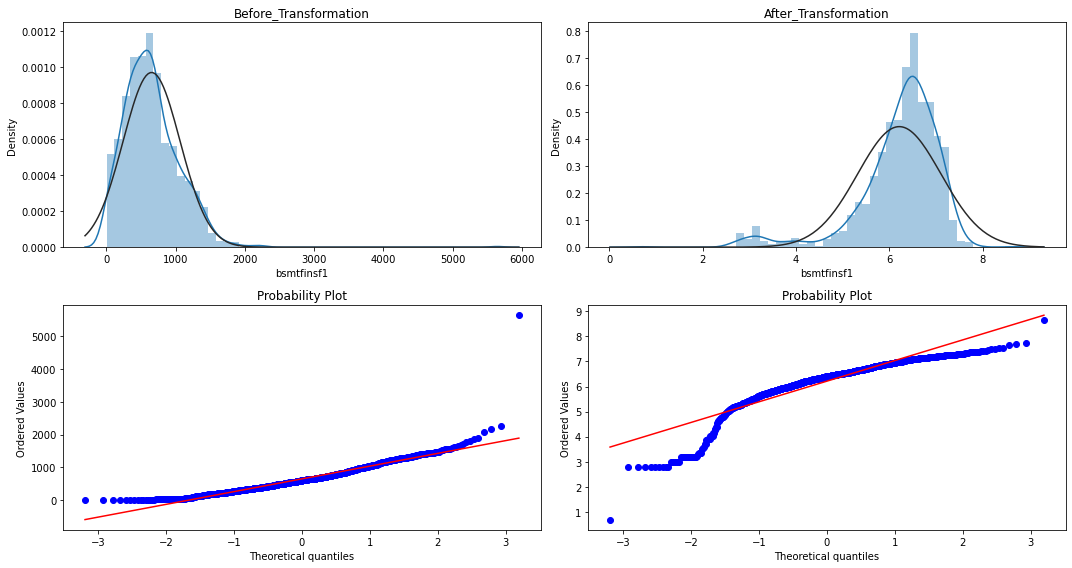

In [16]:
#bsmtfinsf1 (only for houses with basement)

fig, axes = plt.subplots(2,2,figsize=(15,8))

plotting_col = df_train[df_train['bsmtfinsf1']>0]['bsmtfinsf1']

axes[0,0].set_title('Before_Transformation')
sns.distplot(plotting_col, fit = stats.norm, ax = axes[0,0])
stats.probplot(plotting_col, plot=axes[1,0])

axes[0,1].set_title('After_Transformation')
sns.distplot(np.log(plotting_col), fit = stats.norm, ax = axes[0,1])
stats.probplot(np.log(plotting_col), plot=axes[1,1])

plt.tight_layout()

print(f'Before transformation skewness: {plotting_col.skew()}, excess kurtosis:{plotting_col.kurtosis()}')
print(f'After transformation skewness: {np.log(plotting_col).skew()}, excess kurtosis:{np.log(plotting_col).kurtosis()}')

The above log transformation for 'bsmtfinsf1' is not giving desired result and hence tried sqrt transformation

c:\Users\91903\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\91903\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Before transformation skewness: 2.3022746068878592, excess kurtosis:21.323684299099366
After transformation skewness: -0.041044517365571145, excess kurtosis:1.35259368551195


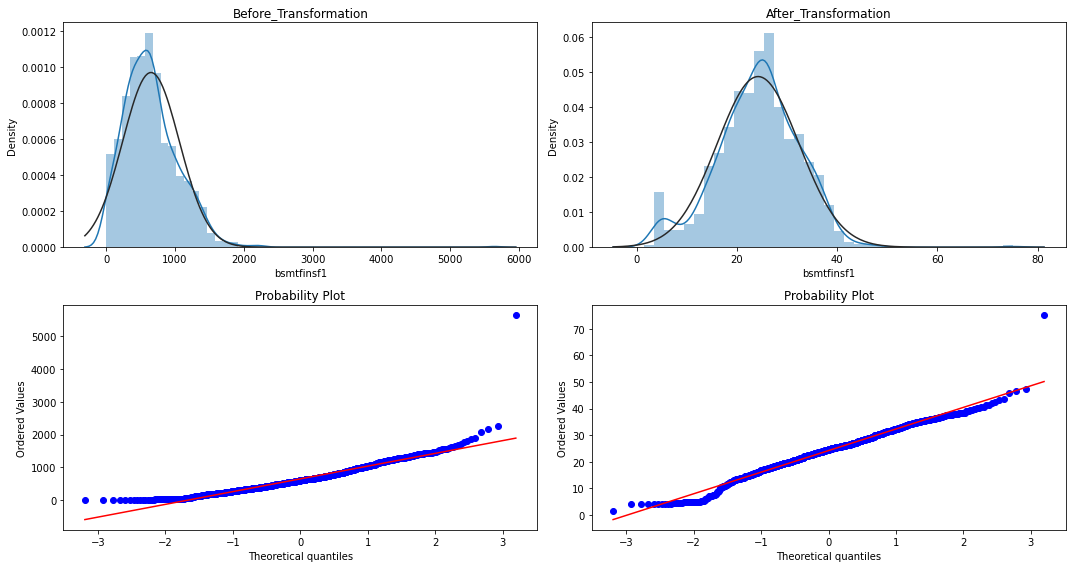

In [17]:
#bsmtfinsf1

fig, axes = plt.subplots(2,2,figsize=(15,8))

plotting_col = df_train[df_train['bsmtfinsf1']>0]['bsmtfinsf1']

axes[0,0].set_title('Before_Transformation')
sns.distplot(plotting_col, fit = stats.norm, ax = axes[0,0])
stats.probplot(plotting_col, plot=axes[1,0])

axes[0,1].set_title('After_Transformation')
sns.distplot(np.sqrt(plotting_col), fit = stats.norm, ax = axes[0,1])
stats.probplot(np.sqrt(plotting_col), plot=axes[1,1])

plt.tight_layout()

print(f'Before transformation skewness: {plotting_col.skew()}, excess kurtosis:{plotting_col.kurtosis()}')
print(f'After transformation skewness: {np.sqrt(plotting_col).skew()}, excess kurtosis:{np.sqrt(plotting_col).kurtosis()}')

In [18]:
#lotfrontage (only for houses with frontage)
plotting_col = df_train[df_train['lotfrontage']>0]['lotfrontage']

print(f'Before transformation skewness: {plotting_col.skew()}, excess kurtosis:{plotting_col.kurtosis()}')
print(f'After log transformation skewness: {np.log(plotting_col).skew()}, excess kurtosis:{np.log(plotting_col).kurtosis()}')
print(f'After sqrt transformation skewness: {np.sqrt(plotting_col).skew()}, excess kurtosis:{np.sqrt(plotting_col).kurtosis()}')
print(f'After cbrt transformation skewness: {np.cbrt(plotting_col).skew()}, excess kurtosis:{np.cbrt(plotting_col).kurtosis()}')
print(f'After reciprocal transformation skewness: {np.reciprocal(plotting_col).skew()}, excess kurtosis:{np.reciprocal(plotting_col).kurtosis()}')

Before transformation skewness: 2.1635691423248837, excess kurtosis:17.452867259818408
After log transformation skewness: -0.7631520156138892, excess kurtosis:2.3542685396348686
After sqrt transformation skewness: 0.3793877251666796, excess kurtosis:4.136659651754199
After cbrt transformation skewness: -0.04340301724272613, excess kurtosis:2.8544452529862934
After reciprocal transformation skewness: 2.522770114084422, excess kurtosis:7.761086166636194


From above, cbrt transformation is reducing skewness and kurtosis to greater extent

c:\Users\91903\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\91903\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


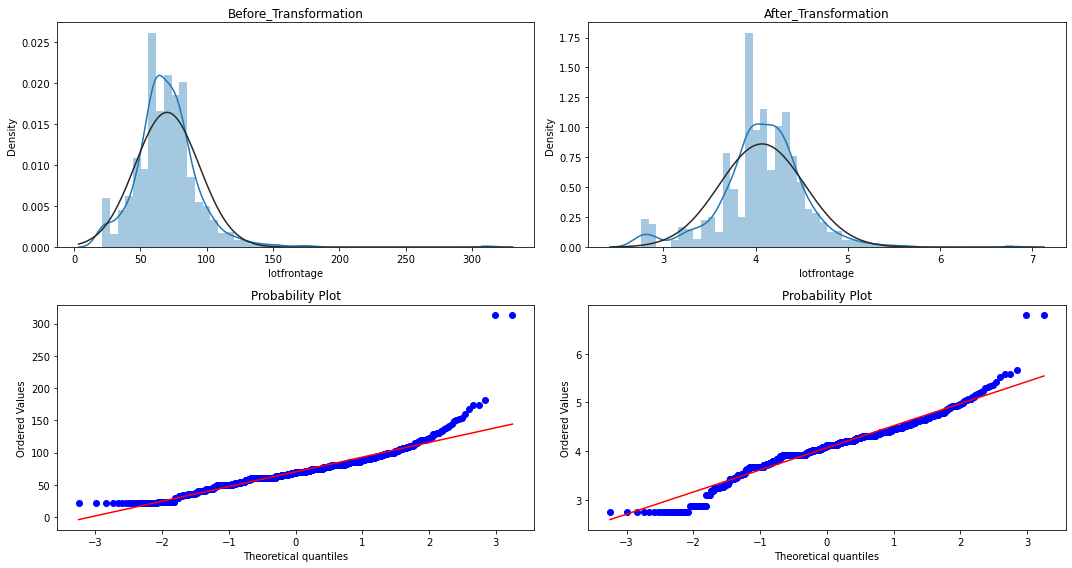

In [19]:
#lotfrontage

fig, axes = plt.subplots(2,2,figsize=(15,8))

plotting_col = df_train[df_train['lotfrontage']>0]['lotfrontage']

axes[0,0].set_title('Before_Transformation')
sns.distplot(plotting_col, fit = stats.norm, ax = axes[0,0])
stats.probplot(plotting_col, plot=axes[1,0])

axes[0,1].set_title('After_Transformation')
sns.distplot(np.cbrt(plotting_col), fit = stats.norm, ax = axes[0,1])
stats.probplot(np.cbrt(plotting_col), plot=axes[1,1])

plt.tight_layout()

c:\Users\91903\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\91903\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


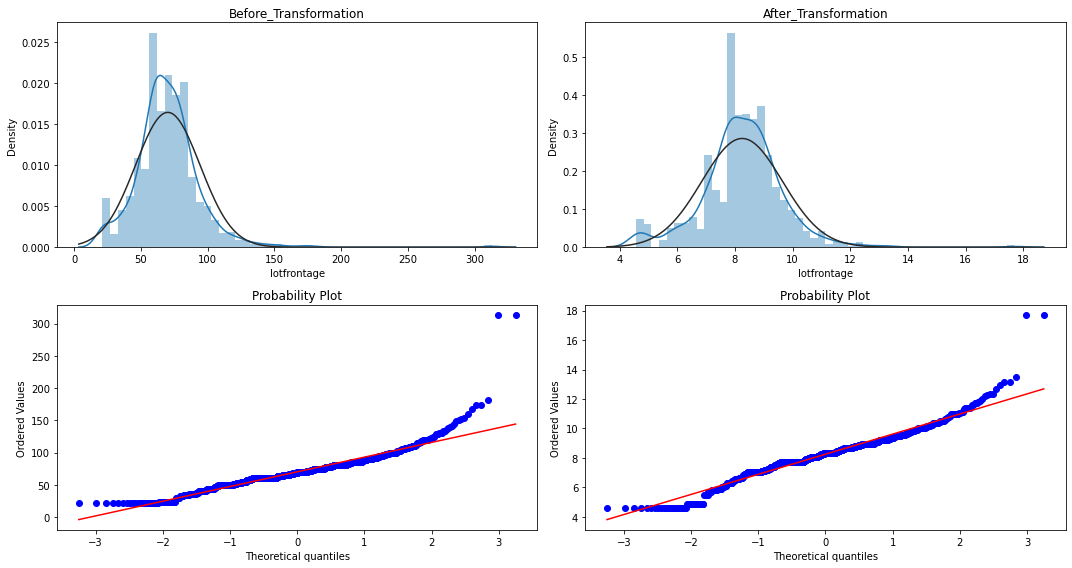

In [20]:
#lotfrontage

fig, axes = plt.subplots(2,2,figsize=(15,8))

plotting_col = df_train[df_train['lotfrontage']>0]['lotfrontage']

axes[0,0].set_title('Before_Transformation')
sns.distplot(plotting_col, fit = stats.norm, ax = axes[0,0])
stats.probplot(plotting_col, plot=axes[1,0])

axes[0,1].set_title('After_Transformation')
sns.distplot(np.sqrt(plotting_col), fit = stats.norm, ax = axes[0,1])
stats.probplot(np.sqrt(plotting_col), plot=axes[1,1])

plt.tight_layout()

c:\Users\91903\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\91903\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


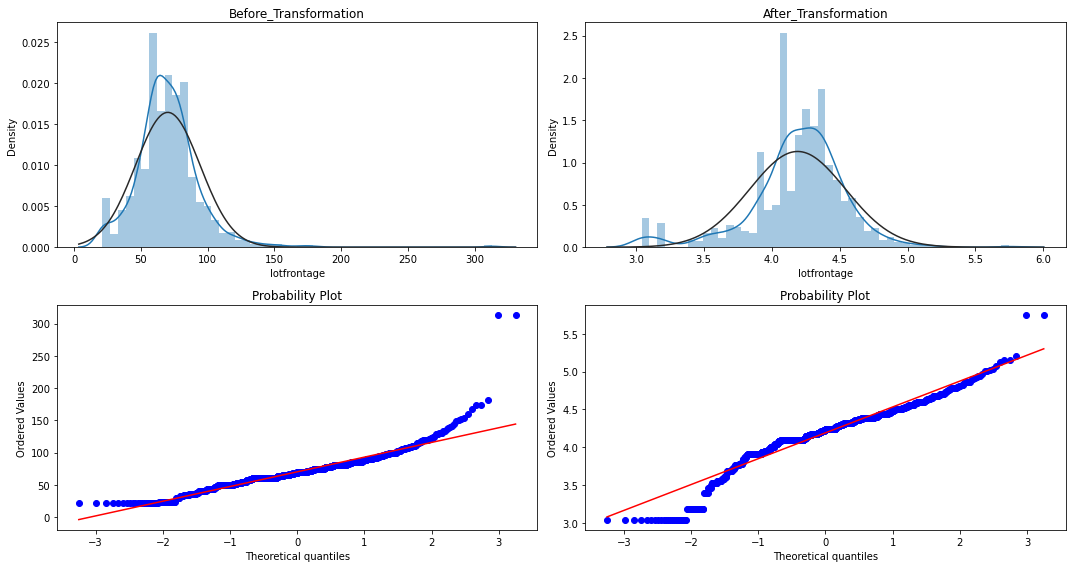

In [21]:
#lotfrontage

fig, axes = plt.subplots(2,2,figsize=(15,8))

plotting_col = df_train[df_train['lotfrontage']>0]['lotfrontage']

axes[0,0].set_title('Before_Transformation')
sns.distplot(plotting_col, fit = stats.norm, ax = axes[0,0])
stats.probplot(plotting_col, plot=axes[1,0])

axes[0,1].set_title('After_Transformation')
sns.distplot(np.log(plotting_col), fit = stats.norm, ax = axes[0,1])
stats.probplot(np.log(plotting_col), plot=axes[1,1])

plt.tight_layout()

LINEAR RELATIONSHIP BETWEEN DEPENDENT VARIABLE AND CONTINIOUS INDEPENDENT VARIABLE USING REGPLOT (SCATTER PLOT FITTED WITH REGRESSION LINE)

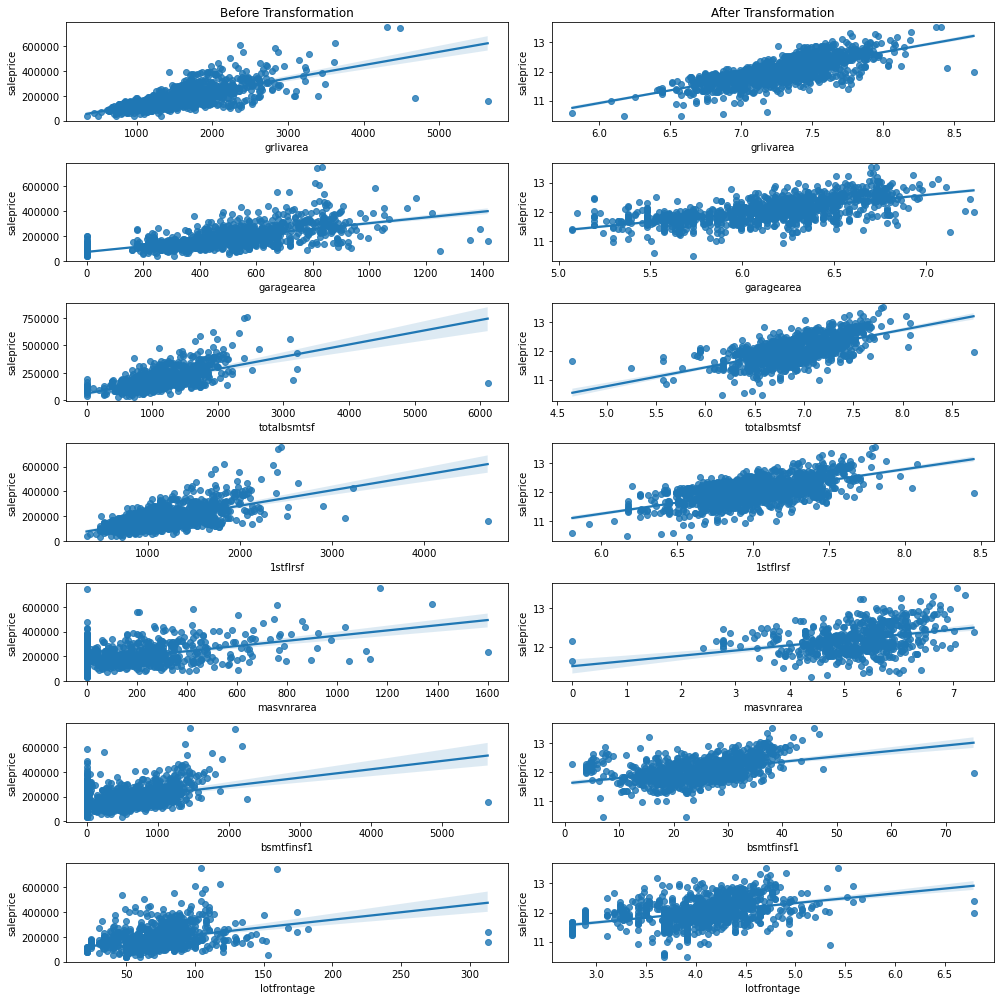

In [22]:
fig,axes = plt.subplots(7,2, figsize = (14,14))
axes[0,0].set_title('Before Transformation')
axes[0,1].set_title('After Transformation')

sns.regplot(x=df_train['grlivarea'], y=df_train['saleprice'], ax=axes[0,0])
sns.regplot(x=np.log(df_train['grlivarea']), y=np.log(df_train['saleprice']), ax=axes[0,1])

sns.regplot(x = df_train['garagearea'], y = df_train['saleprice'], ax = axes[1, 0])
sns.regplot(x = np.log(df_train[df_train['garagearea']>0]['garagearea']), y = np.log(df_train[df_train['garagearea']>0]['saleprice']), ax = axes[1, 1])

sns.regplot(x = df_train['totalbsmtsf'], y = df_train['saleprice'], ax = axes[2, 0])
sns.regplot(x = np.log(df_train[df_train['totalbsmtsf']>0]['totalbsmtsf']), y = np.log(df_train[df_train['totalbsmtsf']>0]['saleprice']), ax = axes[2, 1])

sns.regplot(x = df_train['1stflrsf'], y = df_train['saleprice'], ax = axes[3, 0])
sns.regplot(x = np.log(df_train['1stflrsf']), y = np.log(df_train['saleprice']), ax = axes[3, 1])

sns.regplot(x = df_train['masvnrarea'], y = df_train['saleprice'], ax = axes[4, 0])
sns.regplot(x = np.log(df_train[df_train['masvnrarea']>0]['masvnrarea']), y = np.log(df_train[df_train['masvnrarea']>0]['saleprice']), ax = axes[4, 1])

sns.regplot(x = df_train['bsmtfinsf1'], y = df_train['saleprice'], ax = axes[5, 0])
sns.regplot(x = np.sqrt(df_train[df_train['bsmtfinsf1']>0]['bsmtfinsf1']), y = np.log(df_train[df_train['bsmtfinsf1']>0]['saleprice']), ax = axes[5, 1])

sns.regplot(x = df_train['lotfrontage'], y = df_train['saleprice'], ax = axes[6, 0])
sns.regplot(x = np.cbrt(df_train['lotfrontage']), y = np.log(df_train['saleprice']), ax = axes[6, 1])

plt.tight_layout()

# Null values 

In [23]:
df=pd.concat([df_train,df_test],axis=0)
df_info=pd.DataFrame(index=df.columns.values)
df_info['nullvalues']=df.isnull().sum()
df_info['perc_nulls']=round(df_info.nullvalues/len(df)*100,3)
df_info['corr'] = df_info.apply(lambda row: (df_train.corr().loc['saleprice', row.name] if row.name in df_train.corr().columns else None), axis=1)
print(df_info.sort_values(by='perc_nulls', ascending=False))

               nullvalues  perc_nulls      corr
poolqc               2909      99.657       NaN
miscfeature          2814      96.403       NaN
alley                2721      93.217       NaN
fence                2348      80.439       NaN
saleprice            1459      49.983  1.000000
fireplacequ          1420      48.647       NaN
lotfrontage           486      16.650  0.351799
garagefinish          159       5.447       NaN
garagequal            159       5.447       NaN
garagecond            159       5.447       NaN
garageyrblt           159       5.447  0.486362
garagetype            157       5.379       NaN
bsmtexposure           82       2.809       NaN
bsmtcond               82       2.809       NaN
bsmtqual               81       2.775       NaN
bsmtfintype2           80       2.741       NaN
bsmtfintype1           79       2.706       NaN
masvnrtype             24       0.822       NaN
masvnrarea             23       0.788  0.477493
mszoning                4       0.137   

In [24]:
# df = pd.concat([df_train, df_test], axis=0)
# df_info = pd.DataFrame(index=df.columns.values)
# df_info['nullvalues'] = df.isnull().sum()
# df_info['perc_nulls'] = round(df_info.nullvalues / len(df) * 100, 3)
# df_info.reset_index(inplace=True)
# df_info.rename(columns={'index': 'new_column_name'}, inplace=True)
# df_info['corr'] = df_info.apply(lambda row: df_train.corr().loc['saleprice', row['new_column_name']], axis=1)

# print(df_info.sort_values(by='perc_nulls', ascending=False))


**Observation**:
1. Missing value Columns:
    1. Many missing value: poolqc, miscfeature, alley, fence, fireplacequ 
    2. Some value missing: lotfrontage
    3. Few missing value: masvnrtype, masvnrarea, bsmtqual, bsmtcond, bsmtexposure, bsmtfintype1, bsmtfintype2, electrical, garagetype, garageyrblt, garagefinish, garagequal, garagecond, mszoning, utilities, exterior1st, exterior2nd, bsmtfinsf1, bsmtfinsf2, bsmtunfsf,totalbsmtsf, bsmtfullbath, bsmthalfbath, kitchenqual
#functional, garagecars, garagearea, saletype

2. All Datatype are correct

**Decision**:
1. Remove features with many missing values
2. Impute features with few missing values
3. Other features can be decided by further analysis

In [25]:
# top_9_num_col = list(df_train.select_dtypes(include=[np.number]).corr()['saleprice'].sort_values(ascending = False).drop('saleprice').index[0:9])

# num_row = 3
# num_col = 3

# fig, axes = plt.subplots(num_row, num_col, figsize = (12, 8))

# plt.suptitle('SalesPrice Vs Top 9 corelated numerical features', fontsize = 16)
# for i in range(num_row):
#     for j in range(num_col):
#         if len(top_9_num_col) > 0:
#             col = top_9_num_col.pop(0)
#             df_to_plot = df_train.groupby(col, as_index = False)['saleprice'].mean()
#             sns.regplot(data = df_to_plot, x = col, y = 'saleprice', ax = axes[i, j])
#         if j > 0:
#             axes[i, j].set_yticks([])
#             axes[i, j].set_ylabel(None)

# plt.tight_layout()
# Not suitable because this top 9 contains few of the categorical variables in the form of numbers like garagecars, fullbath,totrmsabvgrd

In [26]:
#Show categorical features with high separating power in average sales price 

cat_col = df_train.select_dtypes(include=['O']).columns
cat_std = []
for col in cat_col:
    col_grp_std = df_train.groupby(col, as_index = False)['saleprice'].mean().agg({'saleprice' : 'std'})
    cat_std.append(col_grp_std['saleprice'])
    
# pd.DataFrame(data = cat_std, columns = cat_col)
cat_std_df = pd.DataFrame(zip(cat_col, cat_std), columns = ['features', 'std'])

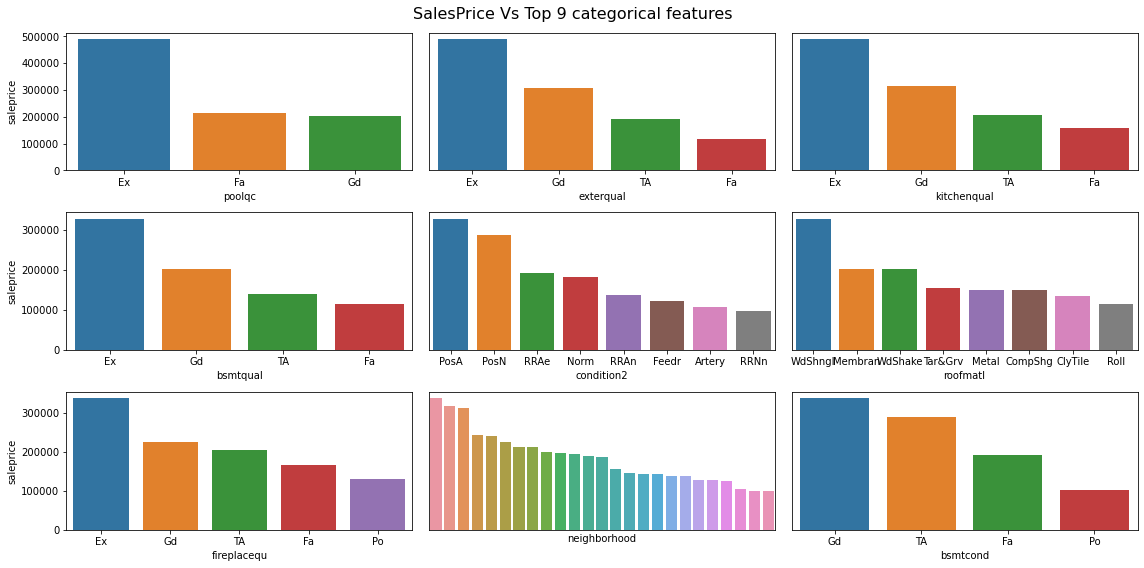

In [27]:
top_9_cat_col = list(cat_std_df.sort_values(by = 'std', ascending = False).head(9)['features'])

num_row = 3
num_col = 3

fig, axes = plt.subplots(num_row, num_col, figsize = (16, 8))

plt.suptitle('SalesPrice Vs Top 9 categorical features', fontsize = 16)
for i in range(num_row):
    for j in range(num_col):
        if len(top_9_cat_col) > 0:
            col = top_9_cat_col.pop(0)
            df_to_plot = df_train.groupby(col, as_index = False)['saleprice'].mean().sort_values(by = 'saleprice', ascending = False)
            sns.barplot(data = df_to_plot, x = col, y = 'saleprice', ax = axes[i, j])
        if j > 0:
            axes[i, j].set_yticks([])
            axes[i, j].set_ylabel(None)
        if col == 'neighborhood':
            axes[i, j].set_xticks([])

plt.tight_layout()

# Data Wrangling

In [28]:
def data_correct(dt):
    dt['masvnrarea']  = np.where(dt['masvnrarea'] == 'None', 0, dt['masvnrarea'])
    dt['masvnrarea'] = dt['masvnrarea'].astype('float')    
    return dt

df_train = data_correct(df_train)
df_test = data_correct(df_test)

In [29]:
#remove outliers for target variables on training dataset
sale_price = df_train['saleprice'].quantile(0.99)
df_train = df_train[df_train['saleprice'] <= sale_price]

Drop features: alley, poolqc, miscfeature, fireplacequ, fence

Impute features: lotfrontage, masvnrtype, masvnrarea, bsmtqual, bsmtcond, bsmtexposure, bsmtfintype1, bsmtfintype2, electrical, garagetype, garageyrblt, garagefinish, garagequal, garagecond, mszoning, utilities, exterior1st, exterior2nd, bsmtfinsf1, bsmtfinsf2, bsmtunfsf, totalbsmtsf, bsmtfullbath, bsmthalfbath, kitchenqual, functional, garagecars, garagearea, saletype

Impute Strategy:
* 1st round: impute by data dictionary 
* 2nd round: impute by mode

In [30]:
def drop_col(dt):
    dt = dt.drop(['alley', 'poolqc', 'miscfeature', 'fireplacequ', 'fence'], axis = 1)
    return dt


# compute dictionary used for impute 
def compute_val_for_missing(dt):
    common_mode_dict = {}
    common_mode_dict['bsmtqual'] = dt['bsmtqual'].mode()[0]
    common_mode_dict['bsmtcond'] = dt['bsmtcond'].mode()[0]
    common_mode_dict['bsmtexposure'] = dt['bsmtexposure'].mode()[0]
    common_mode_dict['bsmtfintype1'] = dt['bsmtfintype1'].mode()[0]
    common_mode_dict['bsmtfintype2'] = dt['bsmtfintype2'].mode()[0]
    common_mode_dict['electrical'] = dt['electrical'].mode()[0]
    common_mode_dict['garagequal'] = dt['garagequal'].mode()[0]
    common_mode_dict['garagecond'] = dt['garagecond'].mode()[0]
    common_mode_dict['mszoning'] = dt['mszoning'].mode()[0]
    common_mode_dict['utilities'] = dt['utilities'].mode()[0]
    common_mode_dict['exterior1st'] = dt['exterior1st'].mode()[0]
    common_mode_dict['exterior2nd'] = dt['exterior2nd'].mode()[0]
    common_mode_dict['kitchenqual'] = dt['kitchenqual'].mode()[0]
    common_mode_dict['functional'] = dt['functional'].mode()[0]
    common_mode_dict['garagecars'] = dt['garagecars'].mode()[0]
    common_mode_dict['saletype'] = dt['saletype'].mode()[0]
    
    neigh_frontage_dict = dict(dt.groupby('neighborhood')['lotfrontage'].mean())
    
    neigh_garage_df1 = dt.groupby(['neighborhood', 'garagetype'], as_index = False).size()
    neigh_garage_df = neigh_garage_df1.iloc[neigh_garage_df1.groupby('neighborhood')['size'].idxmax()]
    neigh_garage_dict = dict(zip(neigh_garage_df['neighborhood'], neigh_garage_df['garagetype']))
    
    neigh_grgfin_df1 = dt.groupby(['neighborhood', 'garagefinish'], as_index = False).size()
    neigh_grgfin_df = neigh_grgfin_df1.iloc[neigh_grgfin_df1.groupby('neighborhood')['size'].idxmax()]
    neigh_grgfin_dict = dict(zip(neigh_grgfin_df['neighborhood'], neigh_grgfin_df['garagefinish']))
    
    return common_mode_dict, neigh_frontage_dict, neigh_garage_dict, neigh_grgfin_dict

# default map missing value by data dictionary
def impute_missing_desc(dt):
    miss_dict = {'alley' : 'no alley access', 
            'masvnrtype' : 'none',
            'masvnrarea' : 0,
            'bsmtqual' : 'no basement', 
            'bsmtcond' : 'no basement', 
            'bsmtexposure' : 'no basement', 
            'bsmtfintype1' : 'no basement',
            'bsmtfintype2' : 'no basement', 
            'fireplacequ' : 'no fireplace', 
            'garagetype' : 'no garage', 
            'garagefinish' : 'no garage',
            'garagequal' : 'no garage', 
            'garagecond' : 'no garage', 
            'poolqc' : 'no pool', 
            'fence' : 'no fence', 
            'miscfeature' : 'none'}
    
    col_w_null = list(dt.columns[dt.isnull().any()])
    
    for col in col_w_null:
        if col in miss_dict.keys():
            dt.loc[dt[col].isnull(), col] = miss_dict[col]
        else:
            None
        
    return dt
    
# impute missing value
def impute_missing_mode_mean(dt, common_mode_dict, neigh_frontage_dict, neigh_garage_dict, neigh_grgfin_dict):
    #drop features that will not be used in the model
#     dt = dt.drop(['id', 'alley', 'poolqc', 'miscfeature', 'fireplacequ', 'fence'], axis = 1)
    
    #impute missing values
   
    dt.loc[dt['masvnrtype'].isnull(), 'masvnrtype'] = 'none'
    dt.loc[dt['masvnrarea'].isnull(), 'masvnrarea'] = 0
    dt.loc[dt['bsmtqual'].isnull(), 'bsmtqual'] = common_mode_dict['bsmtqual']
    dt.loc[dt['bsmtcond'].isnull(), 'bsmtcond'] = common_mode_dict['bsmtcond']
    dt.loc[dt['bsmtexposure'].isnull(), 'bsmtexposure'] = common_mode_dict['bsmtexposure']
    dt.loc[dt['bsmtfintype1'].isnull(), 'bsmtfintype1'] = common_mode_dict['bsmtfintype1']
    dt.loc[dt['bsmtfintype2'].isnull(), 'bsmtfintype2'] = common_mode_dict['bsmtfintype2'] 
    dt.loc[dt['electrical'].isnull(), 'electrical'] = common_mode_dict['electrical']
    dt.loc[dt['garagequal'].isnull(), 'garagequal'] = common_mode_dict['garagequal']
    dt.loc[dt['garagecond'].isnull(), 'garagecond'] = common_mode_dict['garagecond']
    dt.loc[dt['mszoning'].isnull(), 'mszoning'] = common_mode_dict['mszoning']
    dt.loc[dt['utilities'].isnull(), 'utilities'] = common_mode_dict['utilities']
    dt.loc[dt['exterior1st'].isnull(), 'exterior1st'] = common_mode_dict['exterior1st']
    dt.loc[dt['exterior2nd'].isnull(), 'exterior2nd'] = common_mode_dict['exterior2nd']
    dt.loc[dt['kitchenqual'].isnull(), 'kitchenqual'] = common_mode_dict['kitchenqual']
    dt.loc[dt['functional'].isnull(), 'functional'] = common_mode_dict['functional']
    dt.loc[dt['garagecars'].isnull(), 'garagecars'] = common_mode_dict['garagecars']
    dt.loc[dt['saletype'].isnull(), 'saletype'] = common_mode_dict['saletype']
    
    dt.loc[dt['bsmtfinsf1'].isnull(), 'bsmtfinsf1'] = 0
    dt.loc[dt['bsmtfinsf2'].isnull(), 'bsmtfinsf2'] = 0
    dt.loc[dt['bsmtunfsf'].isnull(), 'bsmtunfsf'] = 0
    dt.loc[dt['totalbsmtsf'].isnull(), 'totalbsmtsf'] = 0
    dt.loc[dt['bsmtfullbath'].isnull(), 'bsmtfullbath'] = 0
    dt.loc[dt['bsmthalfbath'].isnull(), 'bsmthalfbath'] = 0
    dt.loc[dt['garagecars'].isnull(), 'garagecars'] = 0
    dt.loc[dt['garagearea'].isnull(), 'garagearea'] = 0
    
     #same neighberhood tends to have same lotfrontage
    dt['lotfrontage'] = np.where(dt['lotfrontage'].isnull(), dt['neighborhood'].map(neigh_frontage_dict), dt['lotfrontage'])
    #use most common garage type in each neighberbood to impute missing in garage type
    dt['garagetype'] = np.where(dt['garagetype'].isnull(), dt['neighborhood'].map(neigh_garage_dict), dt['garagetype'])
    #assume garage is built at the same year as the house
    dt['garageyrblt'] = np.where(dt['garageyrblt'].isnull(), dt['yearbuilt'], dt['garageyrblt'])
    #same neighberhood tends to have same garage interior finish
    dt['garagefinish'] = np.where(dt['garagefinish'].isnull(), dt['neighborhood'].map(neigh_grgfin_dict), dt['garagefinish'])
    
    return dt



In [31]:
dict1, dict2, dict3, dict4 = compute_val_for_missing(df_train)

df_train_clean = drop_col(df_train)
df_train_clean = impute_missing_desc(df_train_clean)
df_train_clean = impute_missing_mode_mean(df_train_clean, dict1, dict2, dict3, dict4)

df_test_clean = drop_col(df_test)
df_test_clean = impute_missing_desc(df_test_clean)
df_test_clean = impute_missing_mode_mean(df_test_clean, dict1, dict2, dict3, dict4)

print(np.any(df_train_clean.isnull()))
print(np.any(df_test_clean.isnull()))

False
False


# Data Creation

Create Garage_flg, Bsmt_flg, MasVnr_flg, Bsmt_type1_flg

In [32]:
def create_flg(dt):
    dt['garage_flg'] = np.where(dt['garagearea'] > 0, 1, 0)
    dt['bsmt_flg'] = np.where(dt['totalbsmtsf'] > 0, 1, 0)
    dt['maxvnr_flg'] = np.where(dt['masvnrarea'] > 0, 1, 0)
    dt['bsmt_type1_flg'] = np.where(dt['bsmtfinsf1']>0, 1, 0)
    return dt

In [33]:
df_train_clean = create_flg(df_train_clean)
df_test_clean = create_flg(df_test_clean)

## Data Conversion:

Transform features:
1. Log transform on 
* SalePrice
* GrLivArea
* GarageArea only if garage_flg = 1
* TotalBsmtSF only if Bsmt_flg = 1
* 1stFlrSF
* MasVnrArea only if MaxVnr_flg = 1

2. Sqrt tranform on
* BsmtFinSF1 only if Bsmt_type1_flg = 1

3. Cbrt transformation on
* LotFrontage

Apply OneHot encoder for categorical variables

Apply Standard Scaler on numerical values

In [34]:
def transform_features(dt):
#     dt['saleprice'] = np.log(dt['saleprice'])
    dt['grlivarea'] = np.log(dt['grlivarea'])
    dt['garagearea'] = np.where(dt['garage_flg'] == 1, np.log(dt['garagearea']), dt['garagearea'])
    dt['totalbsmtsf'] = np.where(dt['bsmt_flg'] == 1, np.log(dt['totalbsmtsf']), dt['totalbsmtsf'])
    dt['1stflrsf'] = np.log(dt['1stflrsf'])
    dt['masvnrarea'] = np.where(dt['maxvnr_flg'] == 1, np.log(dt['masvnrarea']), dt['masvnrarea'])
    dt['bsmtfinsf1'] = np.where(dt['bsmt_type1_flg'] == 1, np.sqrt(dt['bsmtfinsf1']), dt['bsmtfinsf1'])
    dt['lotfrontage'] = np.cbrt(dt['lotfrontage'])
    return dt


In [35]:
df_train_clean = transform_features(df_train_clean)
df_test_clean = transform_features(df_test_clean)

c:\Users\91903\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [36]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

In [37]:
#function 1: fit scaler and Onehot encoder to trainning data
def fit_train(dt_train):
    scaler = MinMaxScaler(feature_range=(0, 1))
    encoder = OneHotEncoder(sparse = False)
    
    dt_train_num = dt_train.select_dtypes(include=[np.number])
    dt_train_cat = dt_train.select_dtypes(include=['O'])  
    
    scaler.fit(dt_train_num)
    encoder.fit(dt_train_cat)
    
    return scaler, encoder

#function 2: apply scaler and ecoder on testing data
def transform_dt(dt, scaler, encoder):
    
    dt_num = dt.select_dtypes(include=[np.number])
    dt_cat = dt.select_dtypes(include=['O']) 
    
    dt_num_transform = scaler.transform(dt_num)
    dt_cat_transform = encoder.transform(dt_cat)
    
    dt_num_transform = pd.DataFrame(dt_num_transform, columns = dt_num.columns)
    dt_cat_transform = pd.DataFrame(dt_cat_transform, columns = encoder.get_feature_names(dt_cat.columns))
    
    dt_out = pd.concat([dt_num_transform, dt_cat_transform], axis = 1)
    
    return dt_out
    

In [38]:
# X = df_train_clean.drop('SalePrice', axis = 1)
# y = df_train_clean['SalePrice']

scaler, encoder = fit_train(df_train_clean.drop('saleprice', axis = 1))
df_train_converted = transform_dt(df_train_clean.drop('saleprice', axis = 1), scaler, encoder)
df_test_converted = transform_dt(df_test_clean, scaler, encoder)

c:\Users\91903\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
c:\Users\91903\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [39]:
print('Train DataFrame shape: ', df_train_converted.shape)
print('Test DataFrame shape: ', df_test_converted.shape)

Train DataFrame shape:  (1445, 285)
Test DataFrame shape:  (1459, 285)


# **Step 4 Simple models**

1. Linear Regression (not available)
2. Random Forest
3. XGBoosting
4. LGB
5. KNN
6. SVM
7. Catboost

In [40]:
# from sklearn.linear_model import LinearRegression
from joblib import dump, load
import pickle
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from xgboost import XGBRegressor, XGBRFRegressor # XGBRF use a subset of feature in each tree (like bagging logic in RandomForest) in boosting to overcome overfitting
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, train_test_split, GridSearchCV, RandomizedSearchCV, KFold
from sklearn.metrics import mean_squared_log_error, mean_squared_error, make_scorer

In [41]:
X = df_train_converted
y = np.log(df_train['saleprice'])

def custom_rmse(y_true, y_pred):
#     log_y_true = np.log(y_true)
#     log_y_pred = np.log(y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse ** 0.5
    return rmse  

# In regrassion, stratified Kfold will make sure the mean of each target group is approximately same, meaning it will be impacted by outlier.
# cv = RepeatedStratifiedKFold(n_repeats=4, n_splits=3, random_state=101)
cv = KFold(n_splits=10, shuffle = True, random_state = 101)
val_score = make_scorer(custom_rmse, greater_is_better=False) #greater is better will negate the scores

In [42]:
## cannot use linear regression since the data is not linear
## the predicted salesprice could have negative value which does not make sense and could not be used in the log operation 
## lm = LinearRegression()
## lm_score = cross_val_score(lm, X = X, y = y, cv = cv, scoring=make_scorer(r2_score), n_jobs=-1)

# rfg = RandomForestRegressor()
# rfg_score = cross_val_score(rfg, X = X, y = y, cv = cv, scoring=val_score, n_jobs=-1)

xgb = XGBRegressor()
xgb_score = cross_val_score(xgb, X = X, y = y, cv = cv, scoring=val_score, n_jobs=-1)

# ## xgbrf = XGBRFRegressor()
# ## xgbrf_score = cross_val_score(xgbrf, X = X, y = y, cv = cv, scoring=val_score, n_jobs=-1)

lgb = LGBMRegressor()
lgb_score = cross_val_score(lgb, X = X, y = y, cv = cv, scoring=val_score, n_jobs=-1)

knn = KNeighborsRegressor()
knn_score = cross_val_score(knn, X = X, y = y, cv = cv, scoring=val_score, n_jobs=-1)

svr = SVR()
svr_score = cross_val_score(svr, X = X, y = y, cv = cv, scoring=val_score, n_jobs=-1)

cbr = CatBoostRegressor(silent=True)
cbr_score = cross_val_score(cbr, X = X, y = y, cv = cv, scoring=val_score, n_jobs=-1)

In [43]:
#since we negate the socre in the make_scorer, we need to negate them back in the reporting
model_result_ini = {
#     'Random Forest' : -rfg_score,
    'XGBoost' : -xgb_score,
#     'XGRFBoost' : -xgbrf_score,
    'LGBoost' : -lgb_score,
    'KNN' : -knn_score,
    'SVR' : -svr_score,
    'CatBoost' : -cbr_score
}

df_model_result_ini = pd.DataFrame(model_result_ini)

In [44]:
# df_model_result_ini.to_pickle('df_model_result_ini.pkl')
# df_model_result_ini = pd.read_pickle('df_model_result_ini.pkl')

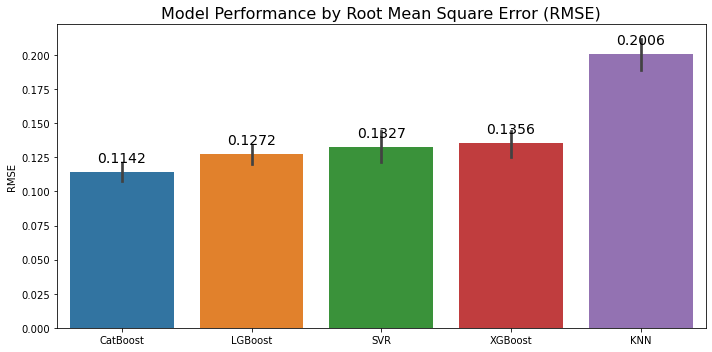

In [45]:
#CatBoost, LGBoost， SVR and XGBoost are four best models with similar loss, I will try to tune the hyperparamters for them. 
plot_order = list(df_model_result_ini.mean().sort_values().index)

fig, ax = plt.subplots(figsize = (10, 5))
ax.set_title('Model Performance by Root Mean Square Error (RMSE)', fontsize = 16)
ax.set_ylabel('RMSE')
sns.barplot(data = df_model_result_ini, order = plot_order)
plt.tight_layout()

for p in ax.patches:
    x,h,w = p.get_x(), p.get_height(), p.get_width()
    ax.annotate(f'{h:.4f}', xy = (x+0.5*w, h), 
                 ha = 'center', xytext=(0,10), fontsize = 14,
                 textcoords = 'offset points')

# Step5 Hyperparameter Tunning**

In [46]:
#model instance
model_ins = {
            'CatBoost' : CatBoostRegressor(silent=True),
            'LGBoost' : LGBMRegressor(),
            'XGBoost' : XGBRegressor(),
            'SVR' : SVR(),
            'RandomForest' : RandomForestRegressor()
        }


#Model Paramter for random search
model_param_rand = {
    'CatBoost' : {'learning_rate' : [0.001, 0.01, 0.1, 1], 
                 'iterations' : [50, 100, 200, 300, 500],
                 'depth' : [3, 6, 9, 12],
                 'l2_leaf_reg': [1, 5, 9], 
                 'random_strength' : [0, 0.5, 1, 2]},
    'LGBoost' : {'num_leaves': [21, 31, 51, 91, 101], 
                 'max_depth' : [5, 6, 7, 8], 
                'learning_rate' : [0.001, 0.01, 0.1, 1], 
                'n_estimators' : [50, 100, 200, 300, 500]},
    'XGBoost' : {'learning_rate' : [0.001, 0.01, 0.1, 1],
                 'n_estimators' : [50, 100, 200, 300, 500]},
    'SVR' : {'C' : [0.05, 0.1, 0.5, 1, 5], 
             'gamma' : ['scale', 0.1, 1, 1.5]},
    'RandomForest' : {
    'n_estimators': [50, 100, 200, 300, 500],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}
             
}

In [47]:
#Define a function used for both random search and grid search
def get_best_parameter(search_type, model_ins, model_param, model_name, val_scoring, X, y):
    
    if search_type == 'grid':
        searcher = GridSearchCV(estimator=model_ins[model_name], 
                                       param_grid=model_param[model_name],
                                       cv = 10,
                                       scoring=val_scoring,
                                       n_jobs=-1)
    else:
        searcher = RandomizedSearchCV(estimator=model_ins[model_name], 
                                       param_distributions=model_param[model_name],
                                       cv = 10,
                                       scoring=val_scoring,
                                       n_jobs=-1)
    
    search_result = searcher.fit(X, y)
    best_param = search_result.best_params_
    best_score = search_result.best_score_ 

    output_param = {model_name : best_param}
    output_score = {model_name : -best_score}
    
    return output_param, output_score
    

In [48]:
#Use RandomSearch to get the approximate parameter value
rd_fr_param, rd_fr_scr = get_best_parameter(search_type = 'rand', model_ins = model_ins, model_param=model_param_rand, 
                                                  model_name = 'RandomForest', val_scoring = val_score, X = X, y = y)
print(rd_fr_param, rd_fr_scr)

cbr_param, cbr_scr = get_best_parameter(search_type = 'rand', model_ins = model_ins, model_param=model_param_rand, 
                                                  model_name = 'CatBoost', val_scoring = val_score, X = X, y = y)
print(cbr_param, cbr_scr)


lgb_param, lgb_scr = get_best_parameter(search_type = 'rand', model_ins = model_ins, model_param=model_param_rand, 
                                                  model_name = 'LGBoost', val_scoring = val_score, X = X, y = y)
print(lgb_param, lgb_scr)
xgb_param, xgb_scr = get_best_parameter(search_type = 'rand', model_ins = model_ins, model_param=model_param_rand, 
                                                  model_name = 'XGBoost', val_scoring = val_score, X = X, y = y)
print(xgb_param, xgb_scr)
svr_param, svr_scr = get_best_parameter(search_type = 'rand', model_ins = model_ins, model_param=model_param_rand, 
                                                  model_name = 'SVR', val_scoring = val_score, X = X, y = y)
print(svr_param, svr_scr)

{'RandomForest': {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 30}} {'RandomForest': 0.13697268574593166}


Results from RandomSearch:

1.({'CatBoost': {'random_strength': 0,
   'learning_rate': 0.1,
   'l2_leaf_reg': 5,
   'iterations': 300,
   'depth': 9}},
 {'CatBoost': 0.12294558290167049})

2.({'LGBoost': {'num_leaves': 21,
   'n_estimators': 100,
   'max_depth': 6,
   'learning_rate': 0.1}},
 {'LGBoost': 0.12417127861741954})

3.({'XGBoost': {'n_estimators': 200, 'learning_rate': 0.1}},
 {'XGBoost': 0.12754047605782112})
 
4.({'RandomForest': {'n_estimators': 300,
   'max_features': 'auto', 'min_samples_split': 5, 'min_samples_leaf': 2,
   'max_depth': 10}},
 {'RandomForest': 0.13753556554932772})

 5. ({'SVR': {'gamma': 'scale', 'C': 5}} {'SVR': 0.13353652210473926})
 

In [ ]:
#Change Parameter range for Grid search
model_param_grid = {
    'CatBoost' : {'learning_rate' : [0.05, 0.1, 0.3], 
                 'iterations' : [200, 300, 400],
                 'depth' : [8,9,10],
                 'l2_leaf_reg': [4,5,6], 
                 'random_strength' : [0,1,2]},
    
    'LGBoost' : {'num_leaves': [1,21,41], 
                 'max_depth' : [5,6,7], 
                'learning_rate' : [0.05, 0.1, 0.5], 
                'n_estimators' : [50,100,200]},
    
    'XGBoost' : {'learning_rate' : [0.05, 0.1, 0.5],
                 'n_estimators' : [250, 300, 350]},
    
    'RandomForest' : {'n_estimators' : [250, 300, 400],
                      'max_depth' : [10, 12, 14], 
                      'max_features' : ["auto"]}, 
    'SVR' : {'C' : [4,5,6], 
            'Gamma' : ['scale']}
}

In [ ]:
# #Use GridSearchCV to get the accurate parameter value
# cbr_param_grid, cbr_scr_grid = get_best_parameter(search_type = 'grid', model_ins = model_ins, model_param=model_param_grid, 
#                                                   model_name = 'CatBoost', val_scoring = val_score, X = X, y = y)
# print(cbr_param_grid)
# print(cbr_scr_grid)
# lgb_param_grid, lgb_scr_grid = get_best_parameter(search_type = 'grid', model_ins = model_ins, model_param=model_param_grid, 
#                                                   model_name = 'LGBoost', val_scoring = val_score, X = X, y = y)
# print(lgb_param_grid)
# print(lgb_scr_grid)
# xgb_param_grid, xgb_scr_grid = get_best_parameter(search_type = 'grid', model_ins = model_ins, model_param=model_param_grid, 
#                                                   model_name = 'XGBoost', val_scoring = val_score, X = X, y = y)
# print(xgb_param_grid)
# print(xgb_scr_grid)
# rfg_param_grid, rfg_scr_grid = get_best_parameter(search_type = 'grid', model_ins = model_ins, model_param=model_param_grid, 
#                                                   model_name = 'RandomForest', val_scoring = val_score, X = X, y = y)
# print(rfg_param_grid)
# print(rfg_scr_grid)
# svr_param_grid, svr_scr_grid = get_best_parameter(search_type = 'grid', model_ins = model_ins, model_param=model_param_rand, 
#                                                   model_name = 'SVR', val_scoring = val_score, X = X, y = y)
# print(svr_param_grid, svr_scr_grid)

Results from GridSearch:

{'CatBoost': {'depth': 5, 'iterations': 600, 'l2_leaf_reg': 2, 'learning_rate': 0.1, 'random_strength': 2}}

{'CatBoost': 0.11894851309125747}

{'LGBoost': {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 600, 'num_leaves': 71}}

{'LGBoost': 0.12775549157628227}

{'XGBoost': {'learning_rate': 0.05, 'n_estimators': 400}}

{'XGBoost': 0.12684262154360684}

{'RandomForest': {'max_depth': 14, 'max_features': 'auto', 'n_estimators': 400}}

{'RandomForest': 0.14233251103941327}

{'SVR': {'C': 1, 'gamma': 'scale'}} 

{'SVR': 0.13314507188653688}

In [ ]:
# Applied tuned hyperparameters on focsed models

# rfg_tuned = RandomForestRegressor(max_depth = 14, max_features = 'auto', n_estimators = 400)
# rfg_score_tuned = cross_val_score(rfg_tuned, X = X, y = y, cv = cv, scoring=val_score, n_jobs=-1)

svr_tuned = SVR(C = 5, gamma = 'scale')
svr_score_tuned = cross_val_score(svr_tuned, X = X, y = y, cv = cv, scoring=val_score, n_jobs=-1)

xgb_tuned = XGBRegressor(learning_rate = 0.1, n_estimators = 200)
xgb_score_tuned = cross_val_score(xgb_tuned, X = X, y = y, cv = cv, scoring=val_score, n_jobs=-1)

lgb_tuned = LGBMRegressor(learning_rate = 0.1, max_depth = 6, n_estimators = 100, num_leaves = 21)
lgb_score_tuned = cross_val_score(lgb_tuned, X = X, y = y, cv = cv, scoring=val_score, n_jobs=-1)

cbr_tuned = CatBoostRegressor(silent=True, depth = 9, iterations = 300, l2_leaf_reg = 5, learning_rate = 0.1, random_strength = 0)
cbr_score_tuned = cross_val_score(cbr_tuned, X = X, y = y, cv = cv, scoring=val_score, n_jobs=-1)

In [ ]:
model_result_tuned = {
#     'Random Forest' : -rfg_score_tuned,
    'XGBoost' : -xgb_score_tuned,
#     'XGRFBoost' : -xgbrf_score,
    'LGBoost' : -lgb_score_tuned,
#     'KNN' : -knn_score,
    'SVR' : -svr_score_tuned,
    'CatBoost' : -cbr_score_tuned
}

df_model_result_tuned = pd.DataFrame(model_result_tuned)

Except CatBoost, other three models have improved about 0.5% in error rate. 
I will use Catboost model before tunning with three tuned models to create voting and stacking model.

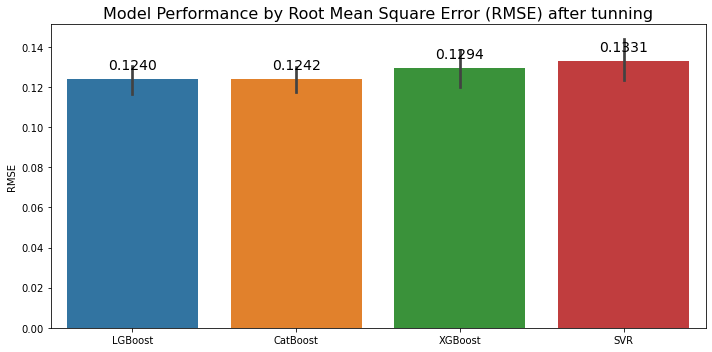

In [ ]:
plot_order = list(df_model_result_tuned.mean().sort_values().index)

fig, ax = plt.subplots(figsize = (10, 5))
ax.set_title('Model Performance by Root Mean Square Error (RMSE) after tunning', fontsize = 16)
ax.set_ylabel('RMSE')
sns.barplot(data = df_model_result_tuned, order = plot_order)
plt.tight_layout()

for p in ax.patches:
    x,h,w = p.get_x(), p.get_height(), p.get_width()
    ax.annotate(f'{h:.4f}', xy = (x+0.5*w, h), 
                 ha = 'center', xytext=(0,10), fontsize = 14,
                 textcoords = 'offset points')

In [ ]:
#Build stacking model 
def stacking_model_fit(X_train, y_train, base_models, meta_model):
    
    skf = KFold(n_splits = 5)
    
    base_model_prediction = np.zeros((X_train.shape[0], len(base_models)))
    
    for train_idx, val_idx in skf.split(X_train, y_train):
        X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx] 
        y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx] 
        for i, base_model in enumerate(base_models):
            base_model.fit(X_train_fold, y_train_fold)
            base_model_prediction[val_idx, i] = base_model.predict(X_val_fold)
    
    meta_model.fit(base_model_prediction, y_train)
    
    return meta_model, base_models
            
            
def stacking_model_pred(X_test, meta_model, base_models_fit):
    
    base_model_prediction_test = np.zeros((X_test.shape[0], len(base_models_fit))) 
    
    for i, base_model in enumerate(base_models_fit):
        base_model_prediction_test[:, i] = base_model.predict(X_test)
    
    meta_model_prediction_test = meta_model.predict(base_model_prediction_test)
    
    return meta_model_prediction_test
        
    

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

#only stacking xgboost, lgb and cbr
base_model_list = [xgb_tuned, lgb_tuned, cbr]
    
meta_model, base_model_fit = stacking_model_fit(X_train, y_train, base_model_list, RidgeCV(alphas=[0.01, 0.1, 1.0, 5.0]))
y_pred = stacking_model_pred(X_test, meta_model, base_model_fit)
stack_scr = custom_rmse(y_test, y_pred)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001402 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3090
[LightGBM] [Info] Number of data points in the train set: 808, number of used features: 158
[LightGBM] [Info] Start training from score 12.022307
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [ ]:
#Build voting model

voting_model = VotingRegressor(estimators = [
#     ('rfg', rfg_tuned),
    ('SVR', svr_tuned),
    ('xgb', xgb_tuned), 
    ('lgbm', lgb_tuned), 
    ('cbr', cbr)
], weights = [0.1, 0.3, 0.3, 0.3], n_jobs = -1)

voting_model_scr = cross_val_score(voting_model, X = X, y = y, cv = 5, scoring = val_score, n_jobs = -1)

In [ ]:
model_result_tuned_all = {
#     'Random Forest' : -rfg_score_tuned,
    'SVR' : -svr_score_tuned,
    'XGBoost' : -xgb_score_tuned,
    'LGBoost' : -lgb_score_tuned,
    'CatBoost' : -cbr_score,
    'Stacking' : stack_scr, 
    'Voting' : -voting_model_scr.mean()
}

df_model_result_tuned_all = pd.DataFrame(model_result_tuned_all)

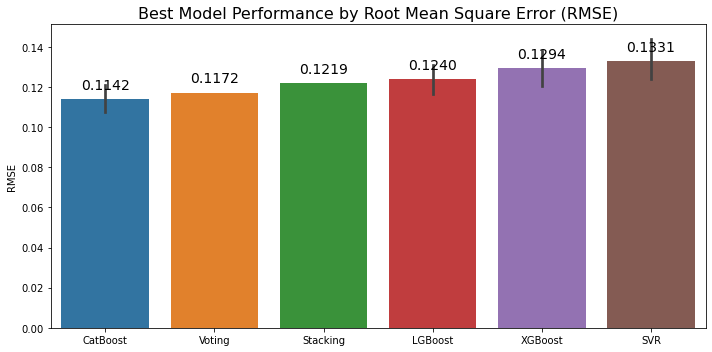

In [ ]:
plot_order = list(df_model_result_tuned_all.mean().sort_values().index)

fig, ax = plt.subplots(figsize = (10, 5))
ax.set_title('Best Model Performance by Root Mean Square Error (RMSE)', fontsize = 16)
ax.set_ylabel('RMSE')
sns.barplot(data = df_model_result_tuned_all, order = plot_order)
plt.tight_layout()

for p in ax.patches:
    x,h,w = p.get_x(), p.get_height(), p.get_width()
    ax.annotate(f'{h:.4f}', xy = (x+0.5*w, h), 
                 ha = 'center', xytext=(0,10), fontsize = 14,
                 textcoords = 'offset points')

# Step6 Neuron Network

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:

X_train.shape

(1011, 285)

In [ ]:
nn_model = Sequential()

nn_model.add(Dense(units = 283, activation = 'relu'))
nn_model.add(Dropout(0.2))

nn_model.add(Dense(units = 146, activation = 'relu'))
nn_model.add(Dropout(0.2))

nn_model.add(Dense(units = 36, activation = 'relu'))
nn_model.add(Dropout(0.2))

# nn_model.add(Dense(units = 18, activation = 'relu'))
# nn_model.add(Dropout(0.2))

# nn_model.add(Dense(units = 9, activation = 'relu'))
# nn_model.add(Dropout(0.2))

nn_model.add(Dense(units = 1, activation = 'relu'))

nn_model.compile(loss = 'MeanSquaredError', optimizer = 'adam')

early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 20)

In [ ]:
nn_model.fit(X_train.values, 
             y_train.values, 
             epochs = 1000, 
             batch_size = 64,
             validation_data = (X_test.values, y_test.values), 
             callbacks = [early_stop],
             verbose = 2)

Epoch 1/1000

16/16 - 3s - loss: 68.4779 - val_loss: 9.7649 - 3s/epoch - 169ms/step
Epoch 2/1000
16/16 - 0s - loss: 12.5582 - val_loss: 5.4045 - 170ms/epoch - 11ms/step
Epoch 3/1000
16/16 - 0s - loss: 7.4835 - val_loss: 0.2281 - 175ms/epoch - 11ms/step
Epoch 4/1000
16/16 - 0s - loss: 5.9014 - val_loss: 0.2147 - 174ms/epoch - 11ms/step
Epoch 5/1000
16/16 - 0s - loss: 5.1628 - val_loss: 0.4448 - 169ms/epoch - 11ms/step
Epoch 6/1000
16/16 - 0s - loss: 5.0489 - val_loss: 0.5524 - 162ms/epoch - 10ms/step
Epoch 7/1000
16/16 - 0s - loss: 4.4823 - val_loss: 0.3642 - 162ms/epoch - 10ms/step
Epoch 8/1000
16/16 - 0s - loss: 4.6933 - val_loss: 0.2615 - 159ms/epoch - 10ms/step
Epoch 9/1000
16/16 - 0s - loss: 4.1894 - val_loss: 0.3766 - 167ms/epoch - 10ms/step
Epoch 10/1000
16/16 - 0s - loss: 4.1377 - val_loss: 0.6074 - 167ms/epoch - 10ms/step
Epoch 11/1000
16/16 - 0s - loss: 3.9086 - val_loss: 0.3269 - 167ms/epoch - 10ms/step
Epoch 12/1000
16/16 - 0s - loss: 3.7352 - val_loss: 0.2811 - 157ms/epoch 

<AxesSubplot:>

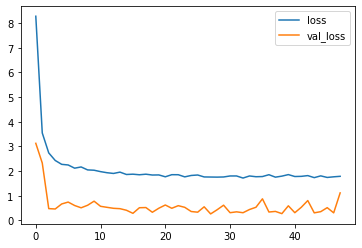

In [ ]:
df_nn_loss = pd.DataFrame(nn_model.history.history)**0.5
df_nn_loss.plot()

In [ ]:
nn_model.evaluate(X_test, y_test)

14/14 [==============================] - 0s 3ms/step - loss: 1.2429


1.2429276704788208

# Step7 Model evaluation

In [ ]:
model_result_final = {
#     'Random Forest' : -rfg_score_tuned,
    'SVR' : -svr_score_tuned,
    'XGBoost' : -xgb_score_tuned,
    'LGBoost' : -lgb_score_tuned,
    'CatBoost' : -cbr_score,
    'Stacking' : stack_scr, 
    'Voting' : -voting_model_scr.mean(), 
    'Neuron Network' : df_nn_loss['val_loss'].min()
}

df_model_result_final = pd.DataFrame(model_result_final)

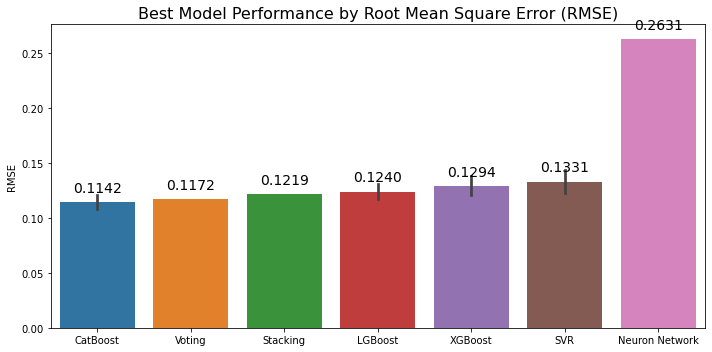

In [ ]:
plot_order = list(df_model_result_final.mean().sort_values().index)

fig, ax = plt.subplots(figsize = (10, 5))
ax.set_title('Best Model Performance by Root Mean Square Error (RMSE)', fontsize = 16)
ax.set_ylabel('RMSE')
sns.barplot(data = df_model_result_final, order = plot_order)
plt.tight_layout()

for p in ax.patches:
    x,h,w = p.get_x(), p.get_height(), p.get_width()
    ax.annotate(f'{h:.4f}', xy = (x+0.5*w, h), 
                 ha = 'center', xytext=(0,10), fontsize = 14,
                 textcoords = 'offset points')

# Step8 Predict on test dataset

In [ ]:
#voting has the best result; best score : 0.1278
voting_model.fit(X, y)
test_pred = voting_model.predict(df_test_converted)
df_test_pred=pd.DataFrame(np.exp(test_pred), columns = ['saleprice'])
df_out = pd.concat([df_test[['id']], df_test_pred], axis = 1)

In [ ]:
cbr.fit(X, y)
test_pred = cbr.predict(df_test_converted)
df_test_pred=pd.DataFrame(np.exp(test_pred), columns = ['saleprice'])
df_out = pd.concat([df_test[['id']], df_test_pred], axis = 1)

In [ ]:
lgb_tuned.fit(X, y)
test_pred = lgb_tuned.predict(df_test_converted)
df_test_pred=pd.DataFrame(np.exp(test_pred), columns = ['saleprice'])
df_out = pd.concat([df_test[['id']], df_test_pred], axis = 1)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002521 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3717
[LightGBM] [Info] Number of data points in the train set: 1445, number of used features: 192
[LightGBM] [Info] Start training from score 12.011792
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

In [ ]:
df_out.to_csv(r'D:\Data Science and OSU\Solo Projects\HousePricePrediction\house-prices-advanced-regression-techniques\sol.csv', index=False)

In [ ]:
s=[continious_variables[i] for i in range(len(continious_variables)) if continious_variables[i] not in cols]
print(s)

[]


In [ ]:
null_counts=df.isnull().sum()
null_counts[null_counts>0]

mszoning           4
lotfrontage      486
alley           2721
utilities          2
exterior1st        1
exterior2nd        1
masvnrtype        24
masvnrarea        23
bsmtqual          81
bsmtcond          82
bsmtexposure      82
bsmtfintype1      79
bsmtfinsf1         1
bsmtfintype2      80
bsmtfinsf2         1
bsmtunfsf          1
totalbsmtsf        1
electrical         1
bsmtfullbath       2
bsmthalfbath       2
kitchenqual        1
functional         2
fireplacequ     1420
garagetype       157
garageyrblt      159
garagefinish     159
garagecars         1
garagearea         1
garagequal       159
garagecond       159
poolqc          2909
fence           2348
miscfeature     2814
saletype           1
saleprice       1459
dtype: int64

In [ ]:
df[df.duplicated()]

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice


In [ ]:
df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2919 non-null   int64  
 1   mssubclass     2919 non-null   int64  
 2   mszoning       2915 non-null   object 
 3   lotfrontage    2433 non-null   float64
 4   lotarea        2919 non-null   int64  
 5   street         2919 non-null   object 
 6   alley          198 non-null    object 
 7   lotshape       2919 non-null   object 
 8   landcontour    2919 non-null   object 
 9   utilities      2917 non-null   object 
 10  lotconfig      2919 non-null   object 
 11  landslope      2919 non-null   object 
 12  neighborhood   2919 non-null   object 
 13  condition1     2919 non-null   object 
 14  condition2     2919 non-null   object 
 15  bldgtype       2919 non-null   object 
 16  housestyle     2919 non-null   object 
 17  overallqual    2919 non-null   int64  
 18  overallc

In [ ]:
df.describe()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garageyrblt,garagecars,garagearea,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [ ]:
# List all columns with string or object dtype
string_columns = df.select_dtypes(include=['object']).columns

# Replace null values in string or object-type columns with 'x'
df[string_columns] = df[string_columns].fillna('x')

# replace zero value for null in continous variables with 'x' as their relation
df[['garageyrblt','masvnrarea']]=df[['garageyrblt','masvnrarea']].fillna(0)

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Assuming 'df' is your DataFrame and 'lotfrontage' is the column with missing values
# Extract the relevant columns
cols_for_imputation = ['lotarea', 'lotfrontage']
df_subset = df[cols_for_imputation]

# Identify rows with missing values in the target column
missing_rows = df_subset[df_subset['lotfrontage'].isnull()]

# Drop the rows with missing values to use for training the linear regression model
training_data = df_subset.dropna()

# Separate features and target variable
X_train = training_data[['lotarea']]
y_train = training_data['lotfrontage']

# Initialize and fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict missing values
imputed_values = model.predict(missing_rows[['lotarea']]).round()
# Replace missing values in the original DataFrame with the predicted values
df.loc[df['lotfrontage'].isnull(), 'lotfrontage'] = imputed_values


In [ ]:
null_counts[null_counts>0]
null_counts=df.isnull().sum()

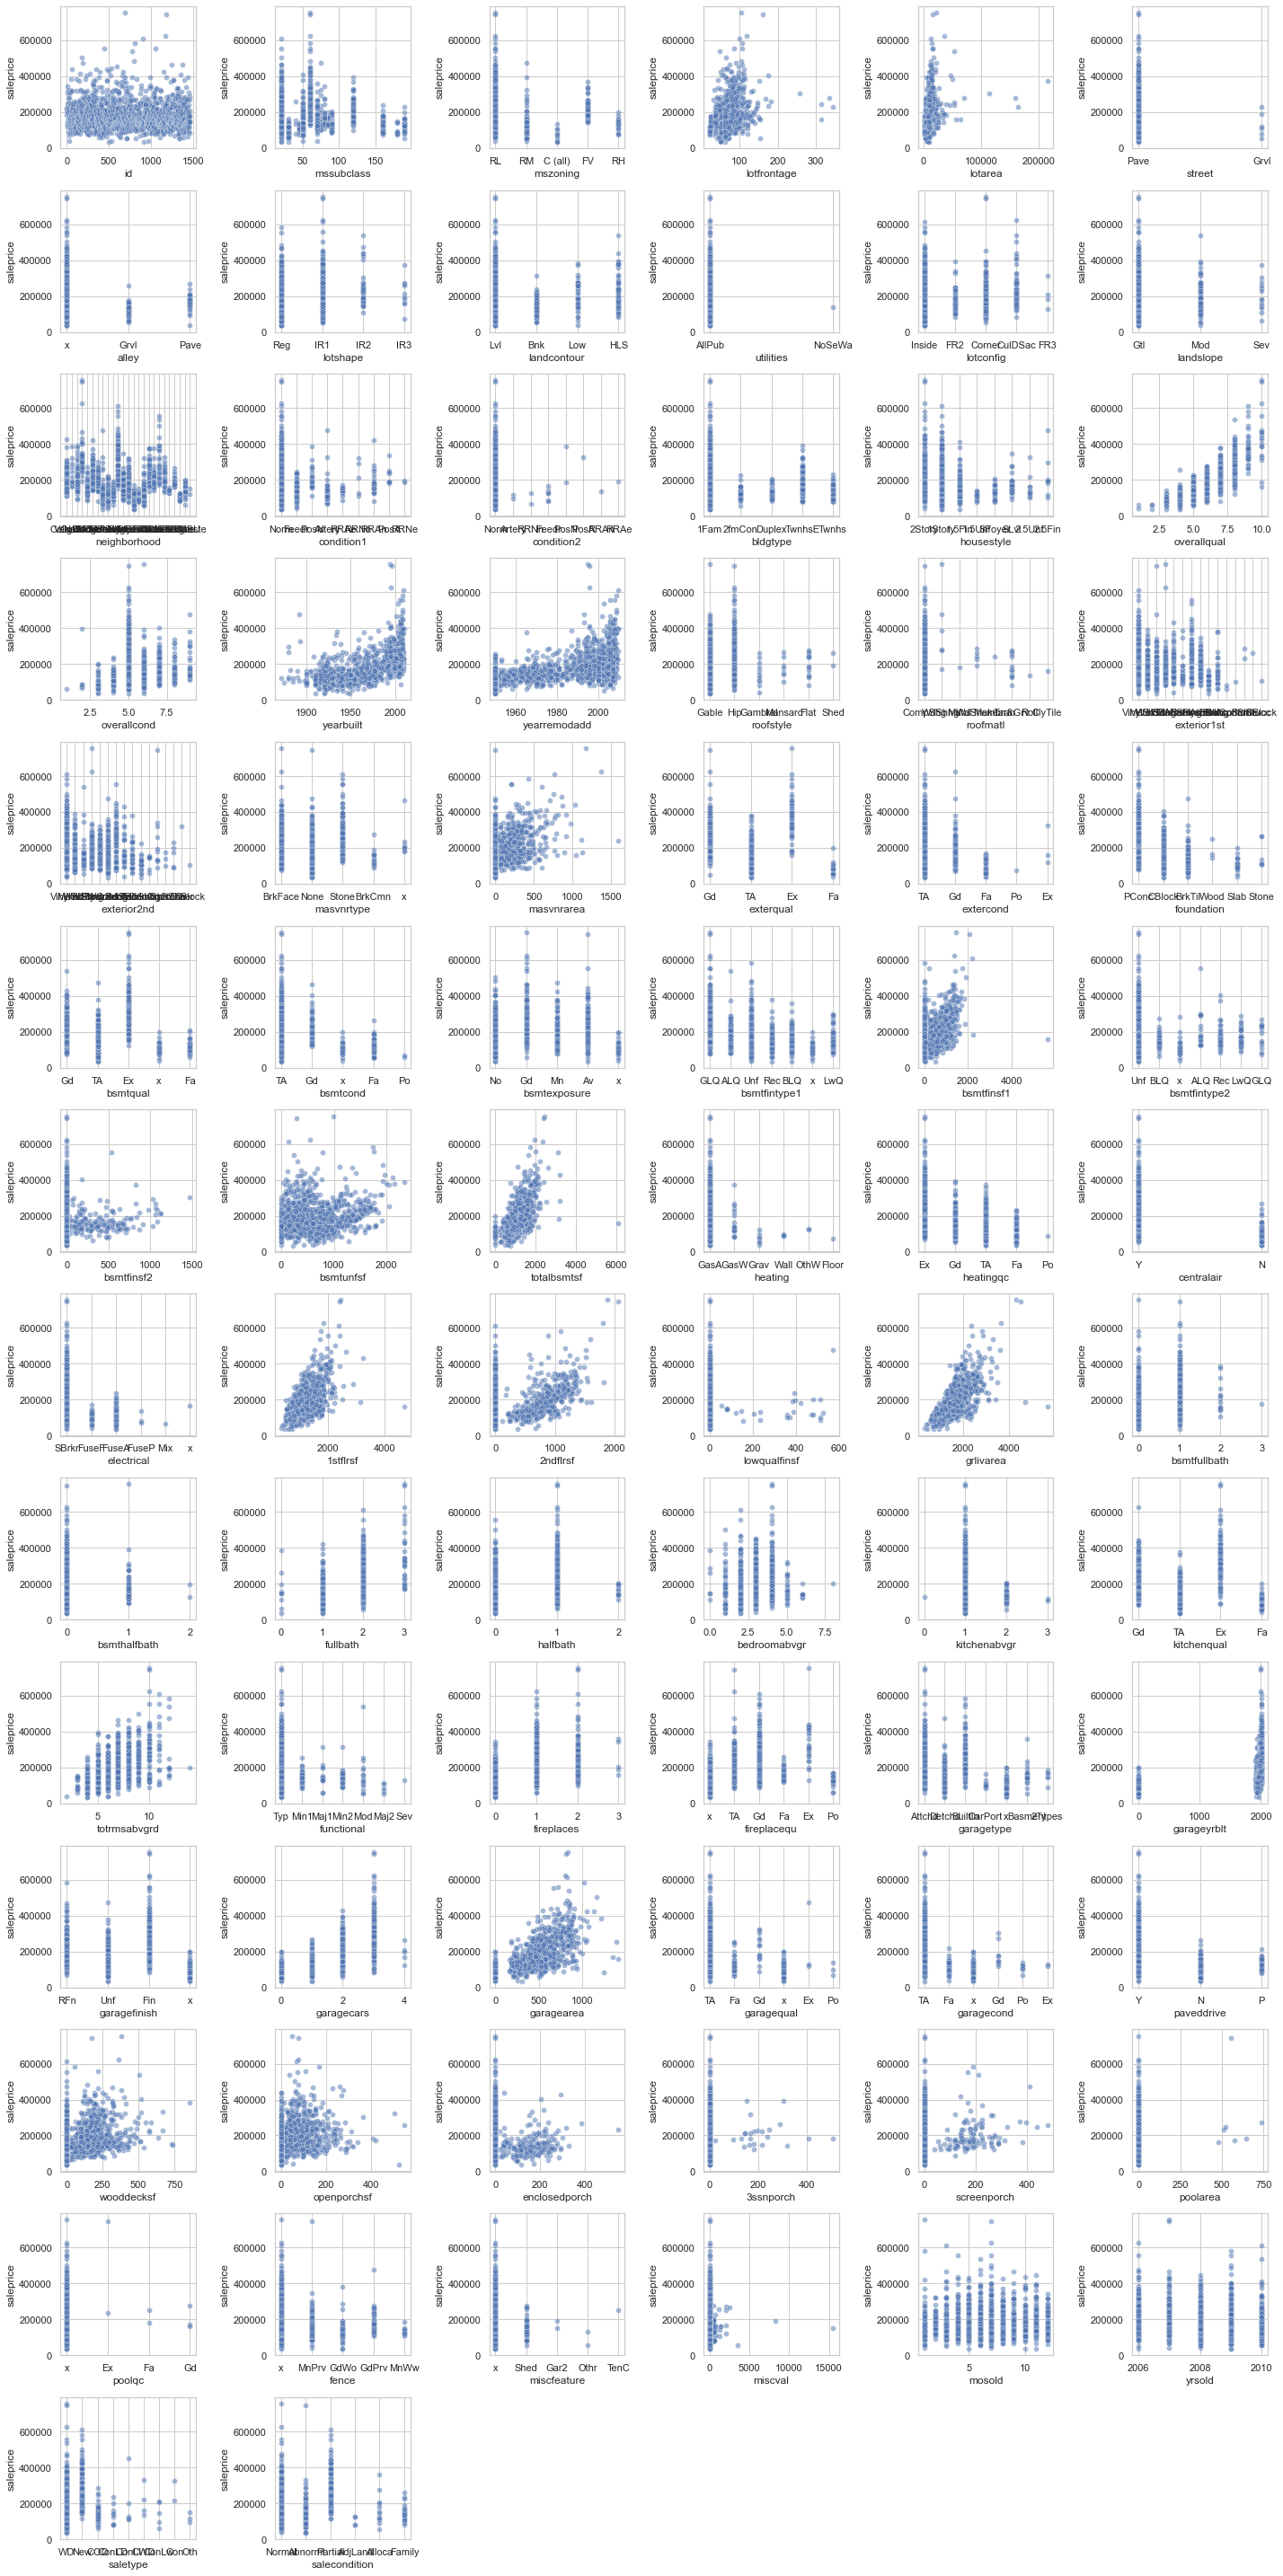

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'target_variable' is the target column
target_variable = 'saleprice'

# Select all columns except the target variable
features = df.drop(target_variable, axis=1).columns

# Set the style of the visualization
sns.set(style="whitegrid")

# Set up the matplotlib figure
plt.figure(figsize=(20, 40))

# Loop through each feature and create scatter plots
for i, feature in enumerate(features):
    plt.subplot(14,6, i + 1)  # Adjust the number of rows and columns as needed
    sns.scatterplot(x=feature, y=target_variable, data=df, alpha=0.5)

plt.tight_layout()
plt.show()


In [ ]:
df.corr()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garageyrblt,garagecars,garagearea,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
id,1.000000,0.008931,-0.033902,-0.040746,-0.029771,-0.002839,-0.016581,-0.050438,-0.026737,-0.016947,0.018251,-0.014453,-0.024924,-0.008678,-0.022252,-0.037816,-0.029046,0.000145,0.010387,-0.009946,-0.015358,0.003074,-0.011702,-0.029368,-0.035236,0.000434,-0.010208,-0.008865,-0.007056,0.009960,0.021609,-0.046538,0.022208,0.014332,0.008244,0.006448,-0.256050,-0.021917
mssubclass,0.008931,1.000000,-0.371099,-0.201730,0.033638,-0.065625,0.034409,0.043315,0.006309,-0.064311,-0.072530,-0.125994,-0.219965,-0.248641,0.309309,0.026482,0.071677,0.009950,-0.001878,0.139140,0.178750,-0.008796,0.260155,0.040509,-0.055151,-0.105161,-0.046597,-0.103394,-0.017654,-0.015923,-0.020867,-0.037529,-0.049181,-0.003080,-0.028867,-0.001231,-0.015028,-0.084284
lotfrontage,-0.033902,-0.371099,1.000000,0.602863,0.181147,-0.061215,0.094992,0.065240,0.200898,0.212483,0.049467,0.094157,0.332525,0.429333,0.021650,0.001913,0.351395,0.110637,0.000688,0.166637,0.027547,0.211282,0.001165,0.310600,0.267538,0.101673,0.281865,0.328856,0.130193,0.148460,0.017217,0.030499,0.061011,0.150466,0.045746,0.006220,-0.012288,0.327861
lotarea,-0.040746,-0.201730,0.602863,1.000000,0.100541,-0.035617,0.024128,0.021612,0.124728,0.194031,0.084059,0.021362,0.254138,0.332460,0.031515,0.000554,0.284519,0.128349,0.026292,0.125826,0.034244,0.132801,-0.020854,0.213802,0.261185,0.073762,0.180434,0.213251,0.158045,0.104797,0.020974,0.015995,0.054375,0.093708,0.069029,0.004156,-0.024234,0.263843
overallqual,-0.029771,0.033638,0.181147,0.100541,1.000000,-0.093847,0.597554,0.571532,0.426528,0.281810,-0.042771,0.275175,0.549294,0.479152,0.245596,-0.048393,0.575126,0.164543,-0.040732,0.528483,0.272668,0.073075,-0.159325,0.389761,0.390753,0.278322,0.600744,0.565122,0.255317,0.298084,-0.139256,0.018715,0.042910,0.030740,0.005562,0.030405,-0.019614,0.790982
overallcond,-0.002839,-0.065625,-0.061215,-0.035617,-0.093847,1.000000,-0.368477,0.047654,-0.133118,-0.050418,0.041501,-0.138202,-0.174002,-0.157418,0.005494,0.009048,-0.116569,-0.042133,0.084181,-0.215504,-0.088577,-0.008477,-0.086700,-0.092027,-0.030999,0.015334,-0.181787,-0.154149,0.020123,-0.068978,0.071044,0.043739,0.043713,-0.016876,0.033956,-0.006256,0.030102,-0.077856
yearbuilt,-0.016581,0.034409,0.094992,0.024128,0.597554,-0.368477,1.000000,0.612235,0.307520,0.279581,-0.027595,0.130473,0.408515,0.310814,0.017588,-0.144191,0.242666,0.211580,-0.030282,0.471169,0.269743,-0.053101,-0.137614,0.114280,0.170680,0.260010,0.538074,0.480735,0.229426,0.198554,-0.374073,0.015958,-0.041046,0.002304,-0.010886,0.013938,-0.012344,0.522897
yearremodadd,-0.050438,0.043315,0.065240,0.021612,0.571532,0.047654,0.612235,1.000000,0.191668,0.152126,-0.062153,0.165175,0.298107,0.242245,0.158985,-0.060371,0.316972,0.134947,-0.046285,0.457980,0.211430,-0.021912,-0.142431,0.198250,0.134157,0.146811,0.426022,0.376765,0.218513,0.242182,-0.220456,0.037433,-0.046878,-0.011407,-0.003124,0.017693,0.033203,0.507101
masvnrarea,-0.026737,0.006309,0.200898,0.124728,0.426528,-0.133118,0.307520,0.191668,1.000000,0.301414,-0.014638,0.087955,0.393657,0.392367,0.119377,-0.057380,0.400088,0.140871,0.016109,0.254085,0.187685,0.078213,-0.051118,0.277103,0.273129,0.128585,0.357744,0.370972,0.166606,0.140880,-0.110614,0.014059,0.066392,0.004791,0.045156,-0.002216,-0.017654,0.472614
bsmtfinsf1,-0.016947,-0.064311,0.212483,0.194031,0.281810,-0.050418,0.279581,0.152126,0.301414,1.000000,-0.055045,-0.477404,0.536467,0.458092,-0.162301,-0.066028,0.211669,0.638847,0.078361,0.081525,-0.007311,-0.113547,-0.086354,0.052141,0.293089,0.125499,0.255482,0.310449,0.223492,0.124163,-0.099712,0.0

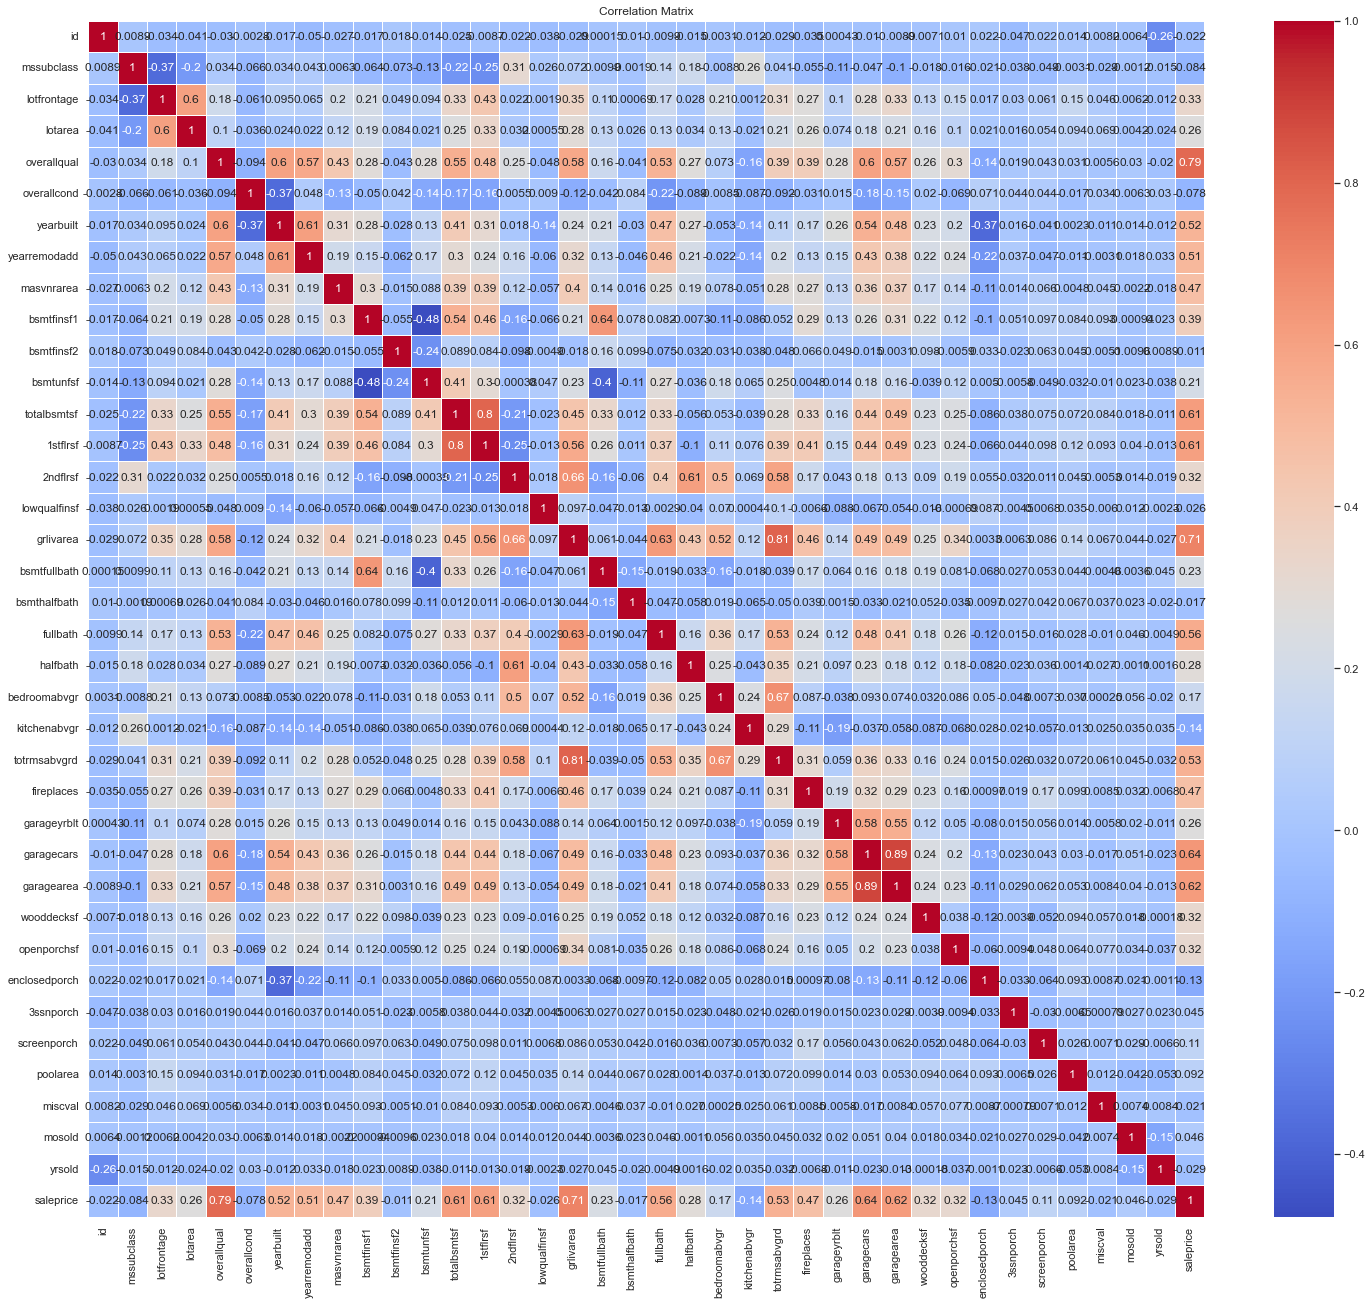

In [ ]:
correlation_matrix=df.corr()
plt.figure(figsize=(25, 22))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame
correlation_matrix = df.corr()

# Set the threshold for correlation
threshold = 0.6

# Find pairs of columns and their correlation values greater than the threshold
high_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_correlations.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# Display the high correlations
print("High Correlations (> 0.75):")
for pair in high_correlations:
    print(f"{pair[0]} and {pair[1]}: {pair[2]}")


High Correlations (> 0.75):
lotfrontage and lotarea: 0.6028629009417243
overallqual and garagecars: 0.6007436637885383
overallqual and saleprice: 0.7909816005838053
yearbuilt and yearremodadd: 0.6122345697556552
bsmtfinsf1 and bsmtfullbath: 0.6388468273955626
totalbsmtsf and 1stflrsf: 0.8016699703092834
totalbsmtsf and saleprice: 0.6135805515591943
1stflrsf and saleprice: 0.6058521846919153
2ndflrsf and grlivarea: 0.6550846935436292
2ndflrsf and halfbath: 0.6113620053965505
grlivarea and fullbath: 0.6302856579751004
grlivarea and totrmsabvgrd: 0.8083544205418535
grlivarea and saleprice: 0.7086244776126515
bedroomabvgr and totrmsabvgrd: 0.6697372307298517
garagecars and garagearea: 0.8897004146858484
garagecars and saleprice: 0.6404091972583519
garagearea and saleprice: 0.6234314389183622


In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame
correlation_matrix = df.corr()

# Set the threshold for correlation
threshold = 0.2

# Find pairs of columns and their correlation values lesser than the threshold
low_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) < threshold and 'saleprice' in [correlation_matrix.columns[i], correlation_matrix.columns[j]]:
            low_correlations.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# Display the low correlations between dependent variables and independent variable
print("Low Correlations (< 0.2):")
for pair in low_correlations:
    print(f"{pair[0]} and {pair[1]}: {pair[2]}")

#############################################################
# Assuming 'df' is your DataFrame
correlation_with_saleprice = df.corr()['saleprice']

# Set the threshold for correlation
threshold = 0.2

# Find columns with correlation values lesser than the threshold
low_correlation_cols = correlation_with_saleprice[abs(correlation_with_saleprice) < threshold].index.tolist()

# Display the columns with low correlation with 'saleprice'
print("Columns with Low Correlation (< 0.2) with 'saleprice':")
print(low_correlation_cols)


Low Correlations (< 0.2):
id and saleprice: -0.021916719443430967
mssubclass and saleprice: -0.08428413512659509
overallcond and saleprice: -0.07785589404867797
bsmtfinsf2 and saleprice: -0.011378121450215146
lowqualfinsf and saleprice: -0.02560613000067955
bsmthalfbath and saleprice: -0.01684415429735895
bedroomabvgr and saleprice: 0.16821315430073963
kitchenabvgr and saleprice: -0.13590737084214105
enclosedporch and saleprice: -0.1285779579259566
3ssnporch and saleprice: 0.04458366533574838
screenporch and saleprice: 0.11144657114291112
poolarea and saleprice: 0.09240354949187318
miscval and saleprice: -0.021189579640303213
mosold and saleprice: 0.046432245223819446
yrsold and saleprice: -0.028922585168736813
Columns with Low Correlation (< 0.2) with 'saleprice':
['id', 'mssubclass', 'overallcond', 'bsmtfinsf2', 'lowqualfinsf', 'bsmthalfbath', 'bedroomabvgr', 'kitchenabvgr', 'enclosedporch', '3ssnporch', 'screenporch', 'poolarea', 'miscval', 'mosold', 'yrsold']


In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame
correlation_matrix = df.corr()

# Set the threshold for correlation
threshold = 0.75

# Find pairs of columns and their correlation values greater than the threshold
high_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold and 'saleprice' not in [correlation_matrix.columns[i], correlation_matrix.columns[j]]:
            high_correlations.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# Display the high correlations between independent variables
print("High Correlations (> 0.75):")
for pair in high_correlations:
    print(f"{pair[0]} and {pair[1]}: {pair[2]}")


High Correlations (> 0.75):
totalbsmtsf and 1stflrsf: 0.8016699703092834
grlivarea and totrmsabvgrd: 0.8083544205418535
garagecars and garagearea: 0.8897004146858484


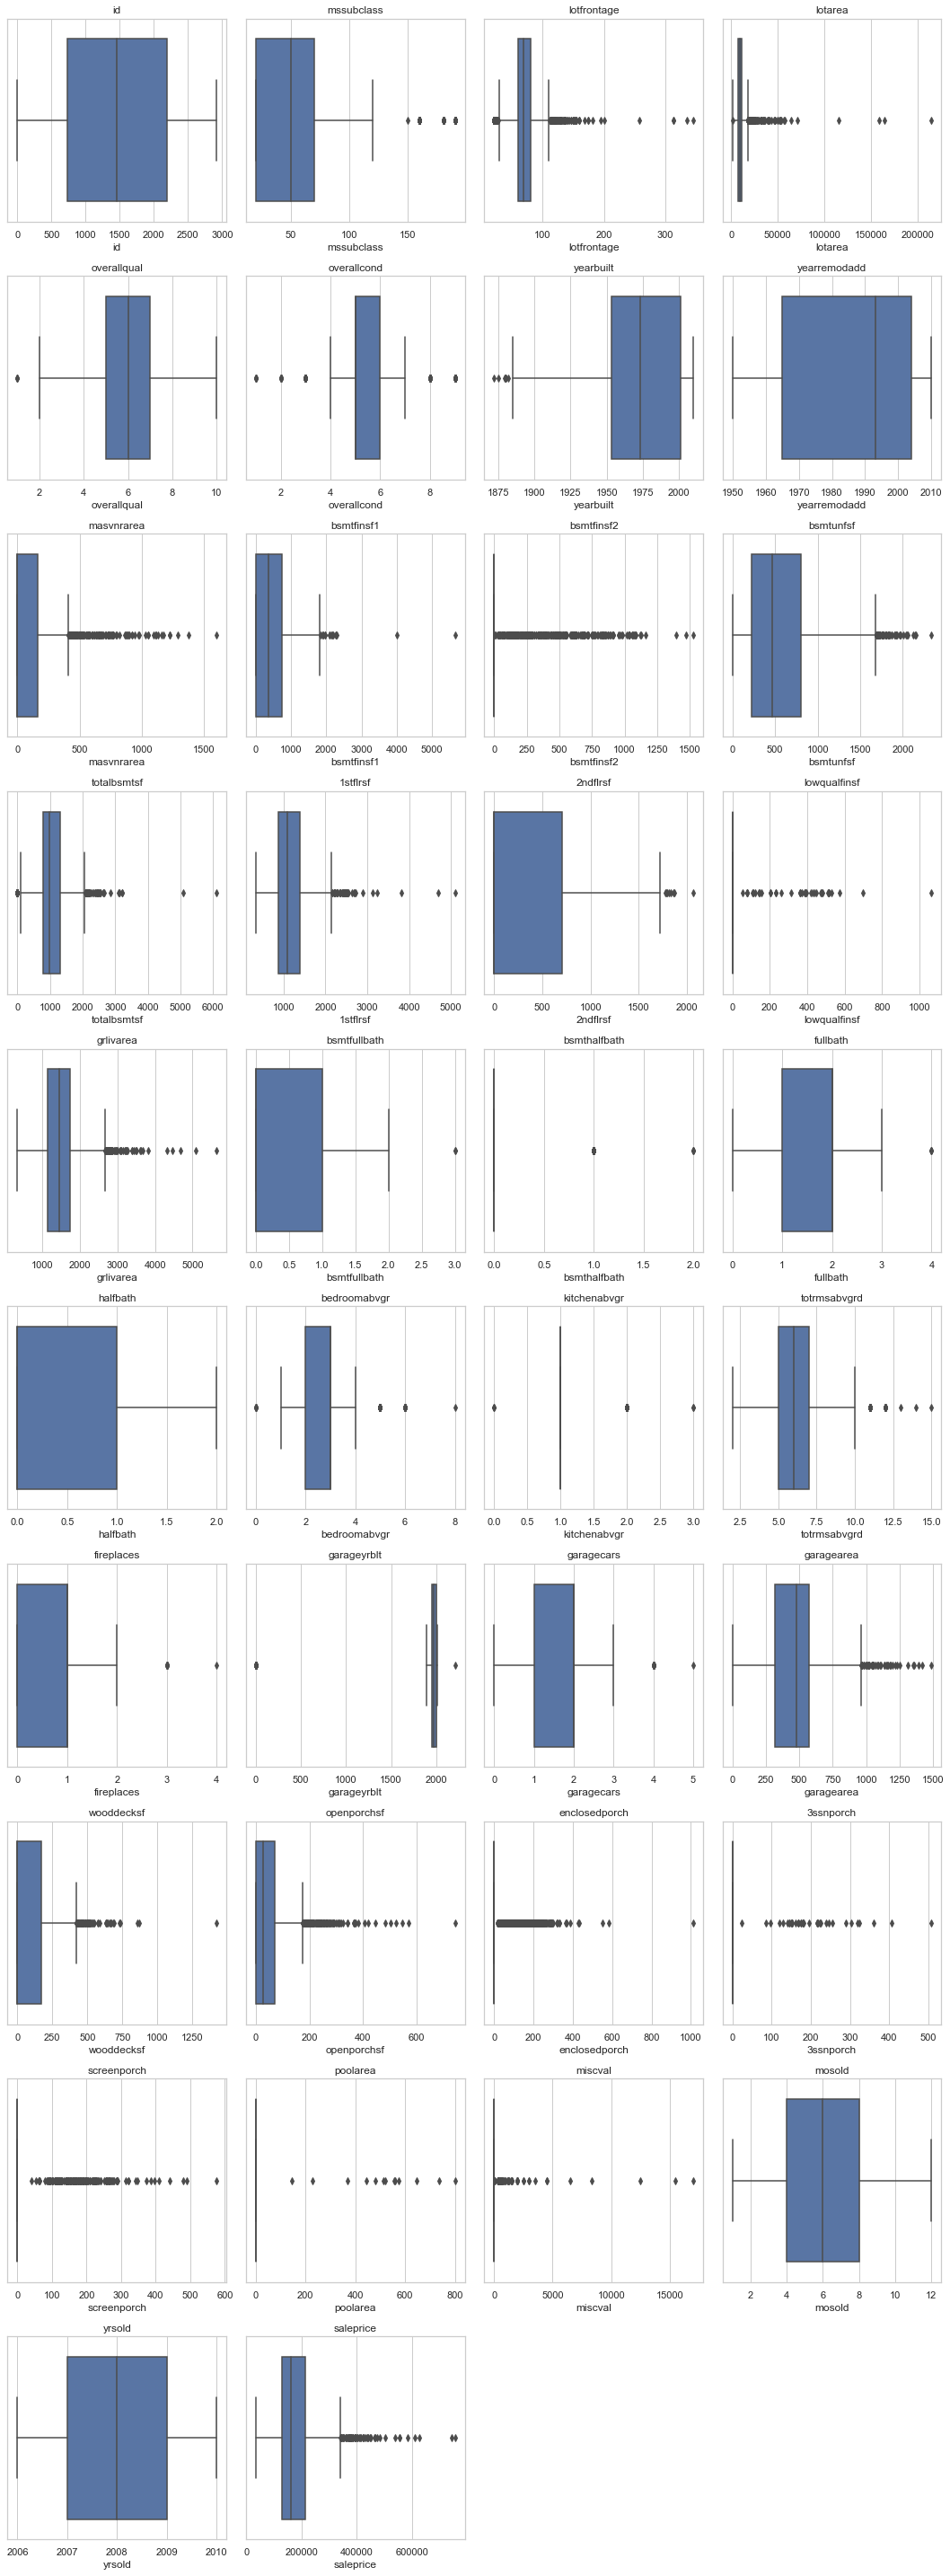

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Select numerical columns only
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the number of rows and columns for the subplots
num_rows = (len(numerical_columns) - 1) // 4 + 1
num_cols = min(len(numerical_columns), 4)

# Set up the matplotlib figure
plt.figure(figsize=(15, 4 * num_rows))

# Loop through each numerical variable and create box plots
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
# Assuming df is your DataFrame
# Assuming cont_vars is a list of column names for continuous variables
# Assuming target_var is the name of the target variable

# Separate features (X) and target variable (y)
# continious_variables=[col for col in continious_variables if col not in low_correlation_cols]
# cat_variables=[col for col in cat_variables if col not in low_correlation_cols]
X_cont=df[continious_variables]
X_cont = X_cont.drop('saleprice', axis=1)
X_cat = df[cat_variables]
y = df['saleprice']
print(X_cont.shape)
print(X_cat.shape)

(2919, 30)
(2919, 50)


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Assuming X_cont_scaled and X_cat_encoded are your scaled continuous and one-hot encoded categorical features

# Create a StandardScaler object
scaler = StandardScaler()

# Create an OneHotEncoder object
encoder = OneHotEncoder()

# Fit and transform the continuous features
X_cont_scaled = scaler.fit_transform(X_cont)

# Fit and transform the categorical features
X_cat_encoded = encoder.fit_transform(X_cat).toarray()

# Convert the scaled continuous features to a DataFrame
X_cont_scaled_df = pd.DataFrame(X_cont_scaled, columns=X_cont.columns)

# Convert the one-hot encoded categorical features to a DataFrame
X_cat_encoded_df = pd.DataFrame(X_cat_encoded, columns=encoder.get_feature_names_out(X_cat.columns))

# Concatenate the two DataFrames along columns (axis=1)
X_merged = pd.concat([X_cont_scaled_df, X_cat_encoded_df], axis=1)

# Now, X_merged is a DataFrame containing both the scaled continuous and one-hot encoded categorical features


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming you have a DataFrame 'X_merged' with features and a Series 'y' with the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_merged, y, test_size=0.2, random_state=42)

# Initialize different regression models
linear_reg_model = LinearRegression()
decision_tree_model = DecisionTreeRegressor(random_state=42)
random_forest_model = RandomForestRegressor(random_state=42)
gradient_boosting_model = GradientBoostingRegressor(random_state=42)

# Train the models
linear_reg_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
gradient_boosting_model.fit(X_train, y_train)

# Make predictions on the test set
linear_reg_preds = linear_reg_model.predict(X_test)
decision_tree_preds = decision_tree_model.predict(X_test)
random_forest_preds = random_forest_model.predict(X_test)
gradient_boosting_preds = gradient_boosting_model.predict(X_test)

# Evaluate models using common regression metrics
linear_reg_metrics = {
    'Mean Squared Error': mean_squared_error(y_test, linear_reg_preds),
    'Mean Absolute Error': mean_absolute_error(y_test, linear_reg_preds),
    'R-squared': r2_score(y_test, linear_reg_preds)
}

decision_tree_metrics = {
    'Mean Squared Error': mean_squared_error(y_test, decision_tree_preds),
    'Mean Absolute Error': mean_absolute_error(y_test, decision_tree_preds),
    'R-squared': r2_score(y_test, decision_tree_preds)
}

random_forest_metrics = {
    'Mean Squared Error': mean_squared_error(y_test, random_forest_preds),
    'Mean Absolute Error': mean_absolute_error(y_test, random_forest_preds),
    'R-squared': r2_score(y_test, random_forest_preds)
}

gradient_boosting_metrics = {
    'Mean Squared Error': mean_squared_error(y_test, gradient_boosting_preds),
    'Mean Absolute Error': mean_absolute_error(y_test, gradient_boosting_preds),
    'R-squared': r2_score(y_test, gradient_boosting_preds)
}

# Display the metrics
print("Linear Regression Metrics:")
print(linear_reg_metrics)

print("\nDecision Tree Regression Metrics:")
print(decision_tree_metrics)

print("\nRandom Forest Regression Metrics:")
print(random_forest_metrics)

print("\nGradient Boosting Regression Metrics:")
print(gradient_boosting_metrics)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming you have a DataFrame 'X_merged' with features and a Series 'y' with the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_merged, y, test_size=0.2, random_state=42)

# Initialize different regression models
linear_reg_model = LinearRegression()
decision_tree_model = DecisionTreeRegressor(random_state=42)
random_forest_model = RandomForestRegressor(random_state=42)
gradient_boosting_model = GradientBoostingRegressor(random_state=42)

# Train the models
linear_reg_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
gradient_boosting_model.fit(X_train, y_train)

# Make predictions on the test set
linear_reg_preds = linear_reg_model.predict(X_test)
decision_tree_preds = decision_tree_model.predict(X_test)
random_forest_preds = random_forest_model.predict(X_test)
gradient_boosting_preds = gradient_boosting_model.predict(X_test)

# Evaluate models using common regression metrics
linear_reg_metrics = {
    'Mean Squared Error': mean_squared_error(y_test, linear_reg_preds),
    'Mean Absolute Error': mean_absolute_error(y_test, linear_reg_preds),
    'R-squared': r2_score(y_test, linear_reg_preds)
}

decision_tree_metrics = {
    'Mean Squared Error': mean_squared_error(y_test, decision_tree_preds),
    'Mean Absolute Error': mean_absolute_error(y_test, decision_tree_preds),
    'R-squared': r2_score(y_test, decision_tree_preds)
}

random_forest_metrics = {
    'Mean Squared Error': mean_squared_error(y_test, random_forest_preds),
    'Mean Absolute Error': mean_absolute_error(y_test, random_forest_preds),
    'R-squared': r2_score(y_test, random_forest_preds)
}

gradient_boosting_metrics = {
    'Mean Squared Error': mean_squared_error(y_test, gradient_boosting_preds),
    'Mean Absolute Error': mean_absolute_error(y_test, gradient_boosting_preds),
    'R-squared': r2_score(y_test, gradient_boosting_preds)
}

# Display the metrics
print("Linear Regression Metrics:")
print(linear_reg_metrics)

print("\nDecision Tree Regression Metrics:")
print(decision_tree_metrics)

print("\nRandom Forest Regression Metrics:")
print(random_forest_metrics)

print("\nGradient Boosting Regression Metrics:")
print(gradient_boosting_metrics)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Assuming you have your features X and target variable y
# X should be a DataFrame containing your features
# y should be a Series containing your target variable
X=X_merged

# Create a Random Forest Regressor model
model = RandomForestRegressor(random_state=42)

# Fit the model to your data
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(importance_df)


In [ ]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming 'X' is your feature matrix and 'y' is your target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a linear regression model
model = LinearRegression()

# Initialize the RFE model with the linear regression estimator
rfe = RFE(model, n_features_to_select=10)  # Choose the number of features to select

# Fit the RFE model to the training data
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X.columns[rfe.support_]

# Transform the training and testing sets to include only selected features
X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)

# Train the model on the selected features
model.fit(X_train_selected, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test_selected)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print('R2:', r2_score(y_test, y_pred))
# Print the selected features
print('Selected Features:', selected_features)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Assuming X is your feature matrix and y is your target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Sequential model
model = Sequential()

# Add the first hidden layer with 64 neurons and 'relu' activation function
model.add(Dense(283, input_dim=X_train_scaled.shape[1], activation='relu'))

# Add the second hidden layer with 32 neurons and 'relu' activation function
model.add(Dense(164, activation='relu'))
model.add(Dense(82, activation='relu'))
# Add the output layer with 1 neuron (for regression) and no activation function (linear activation)
model.add(Dense(1))

# Compile the model with an optimizer, loss function, and metrics
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Train the model on your training data
model.fit(X_train_scaled, y_train, epochs=1000, batch_size=32)
#model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)
# Predict the target variable on your test data
y_pred = model.predict(X_test_scaled)

# Calculate R^2 on the test data
r2 = r2_score(y_test, y_pred)
mse=mean_squared_error(y_test,y_pred)
print(f'Mean Squared Error on Test Data: {mse}')
print(f'R^2 on Test Data: {r2}')
